In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("C:/Users/hemak/Downloads/customer_segmentation.csv")

In [ ]:
pd.set_option('display.max_columns',100)
df.head()

guest_id  year_birth   education marital_status   income  kid_le_12  \
0      5524        1957  Graduation         Single  58138.0          0   
1      2174        1954  Graduation         Single  46344.0          1   
2      4141        1965  Graduation       Together  71613.0          0   
3      6182        1984  Graduation       Together  26646.0          1   
4      5324        1981         PhD        Married  58293.0          1   

   kid_teen dt_customer  recency  amt_wines  amt_fruits  amt_bake  amt_deli  \
0         0  04-09-2012       58        635          88       546       172   
1         1  08-03-2014       38         11           1         6         2   
2         0  21-08-2013       26        426          49       127       111   
3         0  10-02-2014       26         11           4        20        10   
4         0  19-01-2014       94        173          43       118        46   

   amt_sweets  amt_meats  no_deals  no_web  no_catalog  no_store  \
0          88         88         3       8          10         4   
1           1          6         2       1           1         2   
2          21         42         1       8           2        10   
3           3          5         2       2           0         4   
4          27         15         5       5           3         6   

   no_web_visits_month  cmp3_accept  cmp4_accept  cmp5_accept  cmp1_accept  \
0                    7            0            0            0            0   
1                    5            0            0            0            0   
2                    4            0            0            0            0   
3                    6            0            0            0            0   
4                    5            0            0            0            0   

   cmp2_accept  complain  z_costcontact  z_revenue  response  
0            0         0              3         11         1  
1            0         0              3         11         0  
2            0         0              3         11         0  
3            0         0              3         11         0  
4            0         0              3         11         0

In [ ]:
df.shape

(2240, 29)

In [ ]:
def explore_data(df):
    pd.set_option('display.max_rows',100)
    pd.set_option('display.max_columns',100)

    #Get the basic information about the dataframe
    print("Data Shape:")
    print(df.shape)

    print("\nData Columns:")
    print(df.columns)

    #To print columns with null values
    print("\nColimns with null values\n")
    null_counts=df.isnull().sum()
    features_with_null=null_counts[null_counts>0].index
    print(features_with_null)

    print("\nData Info:\n")
    print(df.info())

    #Check for missing values
    print("\nMissing values:\n")
    print(df.isnull().sum())

    #Check for duplicate rows
    print("\nDuplicate rows\n:")
    print(df.duplicated().sum())

    #Explore unique values in all columns
    print("\nUnique values in all columns\n:")
    print(df.nunique())

explore_data(df)



Data Shape:
(2240, 29)

Data Columns:
Index(['guest_id', 'year_birth', 'education', 'marital_status', 'income',
       'kid_le_12', 'kid_teen', 'dt_customer', 'recency', 'amt_wines',
       'amt_fruits', 'amt_bake', 'amt_deli', 'amt_sweets', 'amt_meats',
       'no_deals', 'no_web', 'no_catalog', 'no_store', 'no_web_visits_month',
       'cmp3_accept', 'cmp4_accept', 'cmp5_accept', 'cmp1_accept',
       'cmp2_accept', 'complain', 'z_costcontact', 'z_revenue', 'response'],
      dtype='object')

Colimns with null values

Index(['income'], dtype='object')

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   guest_id             2240 non-null   int64  
 1   year_birth           2240 non-null   int64  
 2   education            2240 non-null   object 
 3   marital_status       2240 non-null   object 
 4   income         

In [ ]:
# Unique values of these columns are 1
df=df.drop(['z_costcontact','z_revenue'],axis=1)

In [ ]:
df.shape

(2240, 27)

In [ ]:
# Calculate skewness while ignoring non-numeric columns
skew_values = df.skew(numeric_only=True)
print(skew_values)

guest_id                0.039832
year_birth             -0.349944
income                  6.763487
kid_le_12               0.635288
kid_teen                0.407115
recency                -0.001987
amt_wines               1.175771
amt_fruits              2.102063
amt_bake                2.083233
amt_deli                1.919769
amt_sweets              2.136081
amt_meats               1.886106
no_deals                2.418569
no_web                  1.382794
no_catalog              1.880989
no_store                0.702237
no_web_visits_month     0.207926
cmp3_accept             3.291705
cmp4_accept             3.241574
cmp5_accept             3.291705
cmp1_accept             3.555444
cmp2_accept             8.472093
complain               10.188972
response                1.971555
dtype: float64


In [ ]:
binary_col = ['cmp3_accept','cmp4_accept','cmp5_accept','cmp1_accept','cmp2_accept','complain','response']

onth    16

In [ ]:
# Deriving new feature 'age' from year of birth

df['age'] = 2024-df['year_birth']

In [ ]:
# Imputating 'income' with median and group based imputation education

df['income'] = df.groupby(['education','age'])['income'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# Converting dt_customer to date format
# Deriving customer year form dt_customer

df['dt_customer'] = pd.to_datetime(df['dt_customer'], dayfirst=True)
df['customer_year'] = df['dt_customer'].dt.year


In [ ]:
# Droping dt_customer and year_birth

df = df.drop('dt_customer',axis = 1)
df = df.drop('year_birth',axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   guest_id             2240 non-null   int64  
 1   education            2240 non-null   object 
 2   marital_status       2240 non-null   object 
 3   income               2240 non-null   float64
 4   kid_le_12            2240 non-null   int64  
 5   kid_teen             2240 non-null   int64  
 6   recency              2240 non-null   int64  
 7   amt_wines            2240 non-null   int64  
 8   amt_fruits           2240 non-null   int64  
 9   amt_bake             2240 non-null   int64  
 10  amt_deli             2240 non-null   int64  
 11  amt_sweets           2240 non-null   int64  
 12  amt_meats            2240 non-null   int64  
 13  no_deals             2240 non-null   int64  
 14  no_web               2240 non-null   int64  
 15  no_catalog           2240 non-null   i

In [ ]:
df.describe()

guest_id         income    kid_le_12     kid_teen      recency  \
count   2240.000000    2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821   52223.116741     0.444196     0.506250    49.109375   
std     3246.662198   25059.825718     0.538398     0.544538    28.962453   
min        0.000000    1730.000000     0.000000     0.000000     0.000000   
25%     2828.250000   35502.500000     0.000000     0.000000    24.000000   
50%     5458.500000   51371.000000     0.000000     0.000000    49.000000   
75%     8427.750000   68325.000000     1.000000     1.000000    74.000000   
max    11191.000000  666666.000000     2.000000     2.000000    99.000000   

         amt_wines   amt_fruits     amt_bake     amt_deli   amt_sweets  \
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    303.935714    26.302232   166.950000    37.525446    27.062946   
std     336.597393    39.773434   225.715373    54.628979    41.280498   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      23.750000     1.000000    16.000000     3.000000     1.000000   
50%     173.500000     8.000000    67.000000    12.000000     8.000000   
75%     504.250000    33.000000   232.000000    50.000000    33.000000   
max    1493.000000   199.000000  1725.000000   259.000000   263.000000   

         amt_meats     no_deals       no_web   no_catalog     no_store  \
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean     44.021875     2.325000     4.084821     2.662054     5.790179   
std      52.167439     1.932238     2.778714     2.923101     3.250958   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       9.000000     1.000000     2.000000     0.000000     3.000000   
50%      24.000000     2.000000     4.000000     2.000000     5.000000   
75%      56.000000     3.000000     6.000000     4.000000     8.000000   
max     362.000000    15.000000    27.000000    28.000000    13.000000   

       no_web_visits_month  cmp3_accept  cmp4_accept  cmp5_accept  \
count          2240.000000  2240.000000  2240.000000  2240.000000   
mean              5.316518     0.072768     0.074554     0.072768   
std               2.426645     0.259813     0.262728     0.259813   
min               0.000000     0.000000     0.000000     0.000000   
25%               3.000000     0.000000     0.000000     0.000000   
50%               6.000000     0.000000     0.000000     0.000000   
75%               7.000000     0.000000     0.000000     0.000000   
max              20.000000     1.000000     1.000000     1.000000   

       cmp1_accept  cmp2_accept     complain     response          age  \
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean      0.064286     0.013393     0.009375     0.149107    55.194196   
std       0.245316     0.114976     0.096391     0.356274    11.984069   
min       0.000000     0.000000     0.000000     0.000000    28.000000   
25%       0.000000     0.000000     0.000000     0.000000    47.000000   
50%       0.000000     0.000000     0.000000     0.000000    54.000000   
75%       0.000000     0.000000     0.000000     0.000000    65.000000   
max       1.000000     1.000000     1.000000     1.000000   131.000000   

       customer_year  
count    2240.000000  
mean     2013.028125  
std         0.684554  
min      2012.000000  
25%      2013.000000  
50%      2013.000000  
75%      2013.000000  
max      2014.000000

In [ ]:
# Numerical Features and Categorical Features

obj_cols=df.select_dtypes(include='object').columns.tolist()
num_cols=df.select_dtypes(include=['int','float']).columns.tolist()
print("\nCategorical columns:\n")
print(obj_cols)
print("\nNumerical columns:\n")
print(num_cols)


Categorical columns:

['education', 'marital_status']

Numerical columns:

['guest_id', 'income', 'kid_le_12', 'kid_teen', 'recency', 'amt_wines', 'amt_fruits', 'amt_bake', 'amt_deli', 'amt_sweets', 'amt_meats', 'no_deals', 'no_web', 'no_catalog', 'no_store', 'no_web_visits_month', 'cmp3_accept', 'cmp4_accept', 'cmp5_accept', 'cmp1_accept', 'cmp2_accept', 'complain', 'response', 'age', 'customer_year']


In [ ]:
# Categorical features

for i in obj_cols:
    print(i)
    print(df[i].unique())
    print("\n")

education
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


marital_status
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']




In [ ]:
# Value counts of categorical features

for i in obj_cols:
    print(i)
    print(df[i].value_counts())
    print("\n")

education
education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


marital_status
marital_status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64




In [ ]:
# Drop rows where Marital_Status is 'Alone', 'Absurd', or 'YOLO'

df = df[~df['marital_status'].isin(['Alone', 'Absurd', 'YOLO'])]

# Check if rows were dropped
print(df['marital_status'].unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow']


In [ ]:
df['kid_le_12'].value_counts()

kid_le_12
0    1289
1     896
2      48
Name: count, dtype: int64

In [ ]:
df['kid_teen'].value_counts()

kid_teen
0    1155
1    1026
2      52
Name: count, dtype: int64

In [ ]:
# Deriving children column by addition of teen_kids and kids_le_12

df['children'] = df['kid_teen']+df['kid_le_12']

In [ ]:
df.shape

(2233, 28)

In [ ]:
df.children.value_counts()

children
1    1125
0     636
2     419
3      53
Name: count, dtype: int64

In [ ]:
df.columns

Index(['guest_id', 'education', 'marital_status', 'income', 'kid_le_12',
       'kid_teen', 'recency', 'amt_wines', 'amt_fruits', 'amt_bake',
       'amt_deli', 'amt_sweets', 'amt_meats', 'no_deals', 'no_web',
       'no_catalog', 'no_store', 'no_web_visits_month', 'cmp3_accept',
       'cmp4_accept', 'cmp5_accept', 'cmp1_accept', 'cmp2_accept', 'complain',
       'response', 'age', 'customer_year', 'children'],
      dtype='object')

In [ ]:
cols = ['education', 'marital_status','kid_le_12', 'kid_teen','no_deals', 'no_web', 'no_catalog', 'no_store', 'no_web_visits_month','children','customer_year']

Count plot for: education


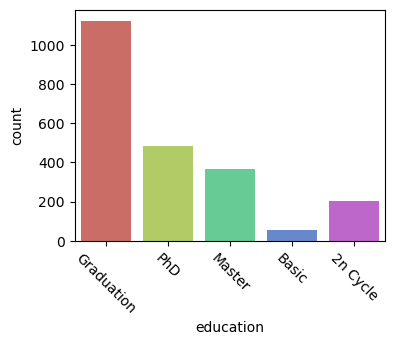



Count plot for: marital_status


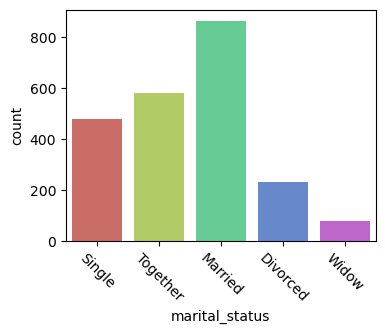



Count plot for: kid_le_12


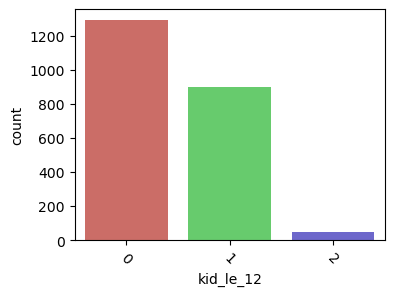



Count plot for: kid_teen


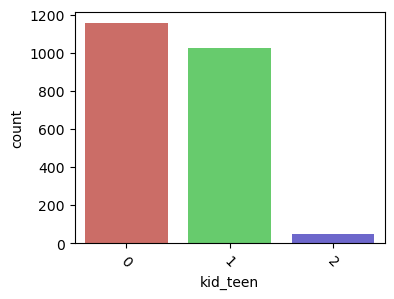



Count plot for: no_deals


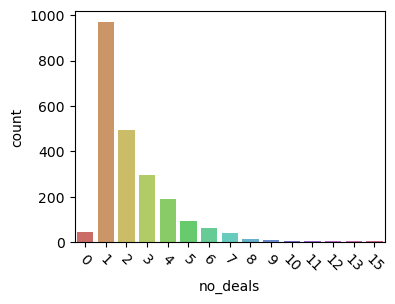



Count plot for: no_web


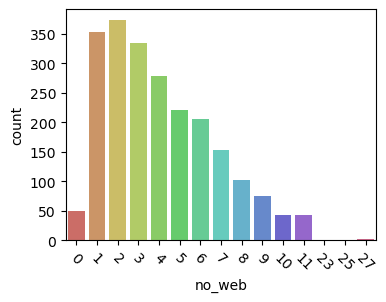



Count plot for: no_catalog


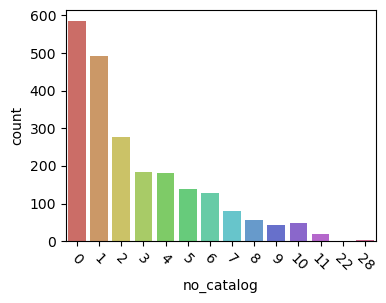



Count plot for: no_store


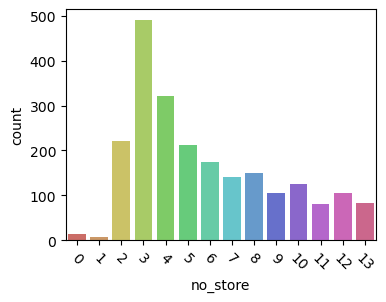



Count plot for: no_web_visits_month


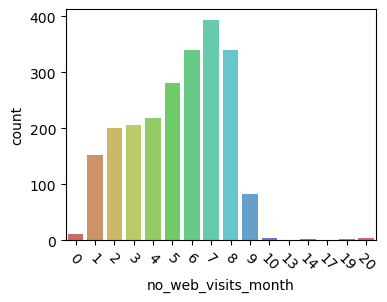



Count plot for: children


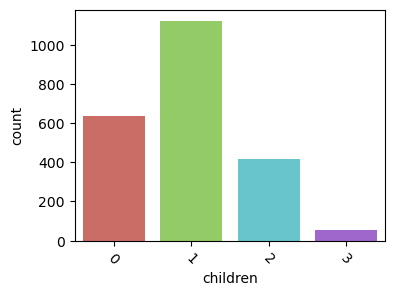



Count plot for: customer_year


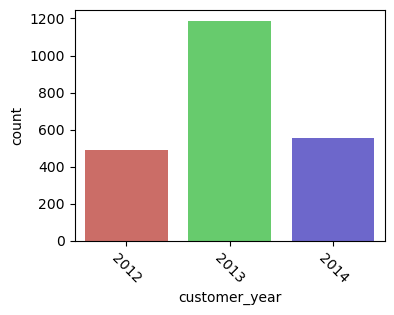



binary features
Count plot for: cmp3_accept


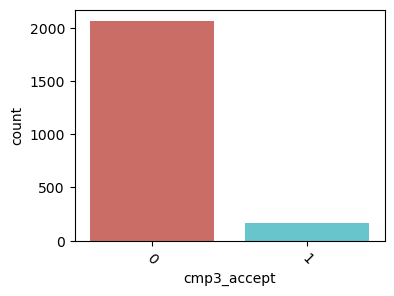



Count plot for: cmp4_accept


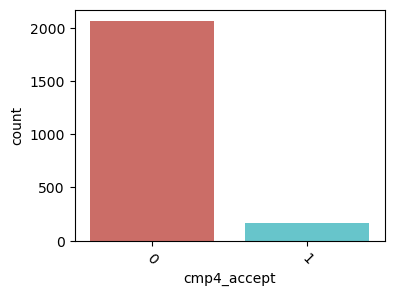



Count plot for: cmp5_accept


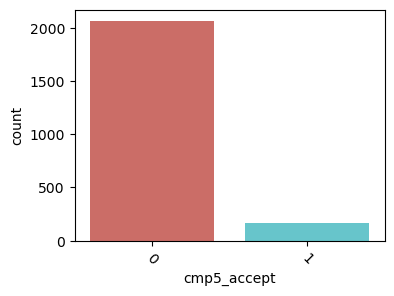



Count plot for: cmp1_accept


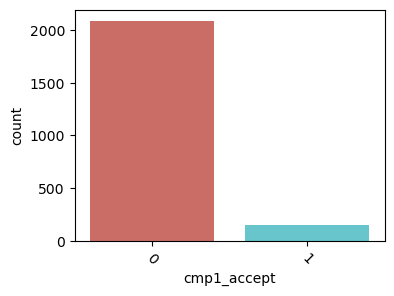



Count plot for: cmp2_accept


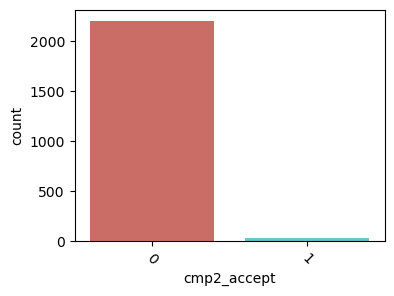



Count plot for: complain


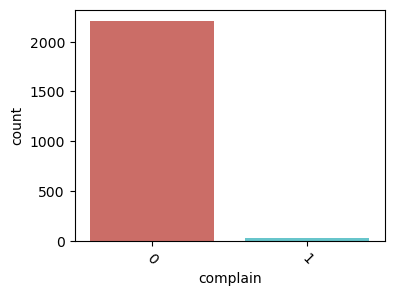



Count plot for: response


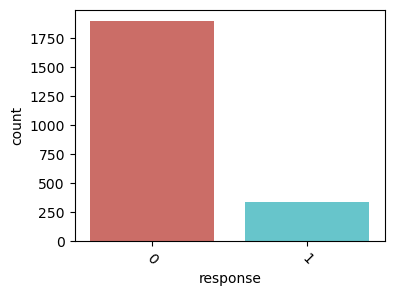

In [ ]:
# Count plot for countable features (cols)
for i in cols:
    print("Count plot for:",i)
    plt.figure(figsize=(4,3))
    sns.countplot(x=i,data=df,palette='hls')
    plt.xticks(rotation=-45)
    plt.show()
    print("\n")

# Count plot for binary features(binary_col)
print("binary features")

for i in binary_col:
    print("Count plot for:",i)
    plt.figure(figsize=(4,3))
    sns.countplot(x=i,data=df,palette='hls')
    plt.xticks(rotation=-45)
    plt.show()
    print("\n")


Pie plot for: education


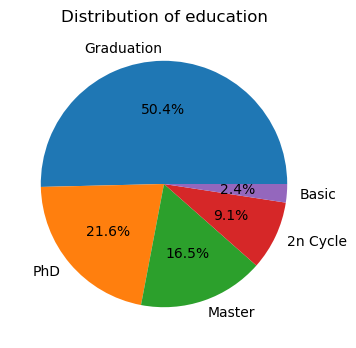



Pie plot for: marital_status


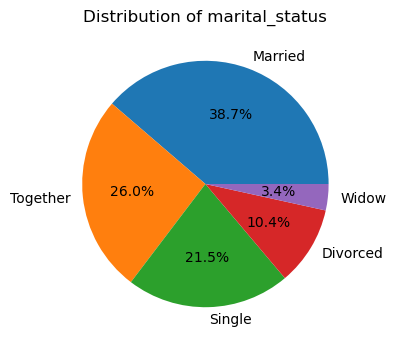



Pie plot for: kid_le_12


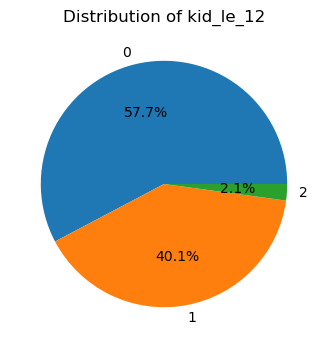



Pie plot for: kid_teen


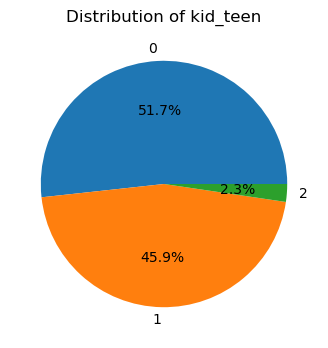



Pie plot for: children


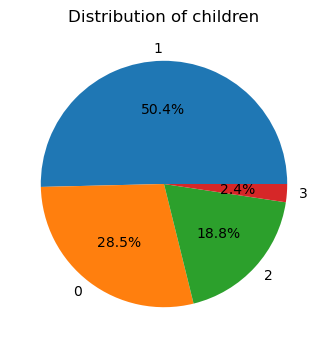



Pie plot for: customer_year


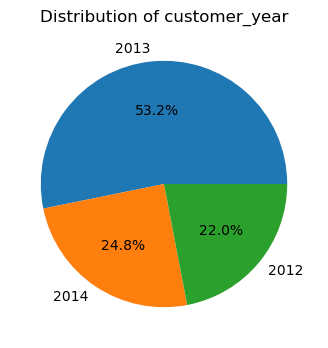



binary features
Pie plot for: cmp3_accept


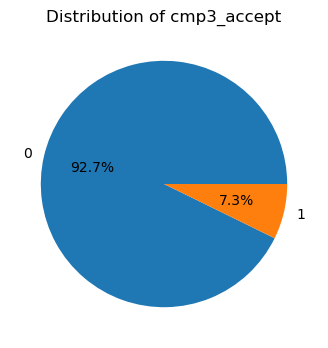



Pie plot for: cmp4_accept


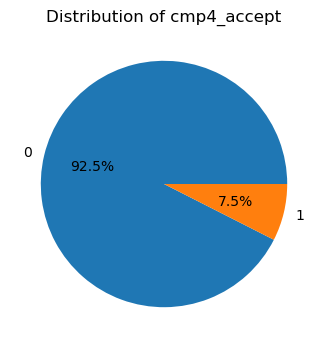



Pie plot for: cmp5_accept


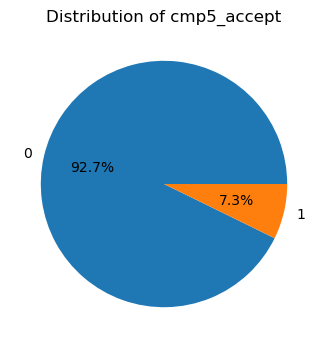



Pie plot for: cmp1_accept


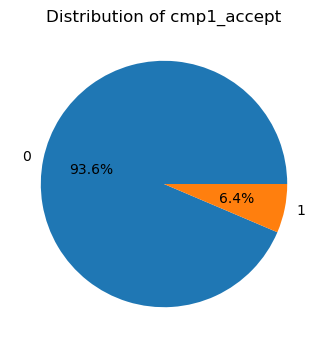



Pie plot for: cmp2_accept


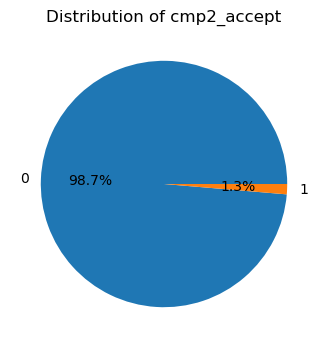



Pie plot for: complain


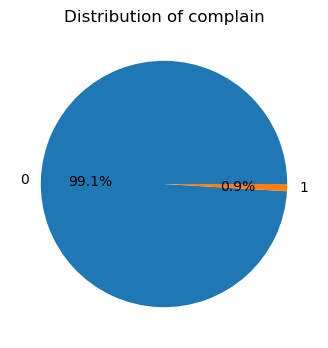



Pie plot for: response


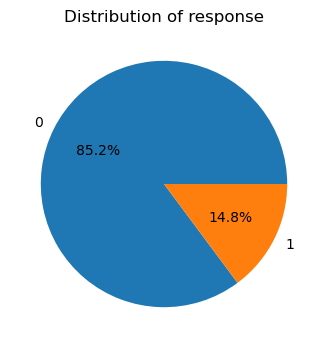

In [ ]:
# Pie plots for countable features

cols = ['education', 'marital_status','kid_le_12', 'kid_teen','children','customer_year']
for i in cols:
    print("Pie plot for:",i)
    plt.figure(figsize=(5,4))
    df[i].value_counts().plot(kind='pie',autopct='%1.1f%%')
    plt.title('Distribution of '+i)
    plt.ylabel('')
    plt.show()
    print("\n")

# pie plots for binary features
print("binary features")

for i in binary_col:
    print("Pie plot for:",i)
    plt.figure(figsize=(5,4))
    df[i].value_counts().plot(kind='pie',autopct='%1.1f%%')
    plt.title('Distribution of '+i)
    plt.ylabel('')
    plt.show()
    print("\n")


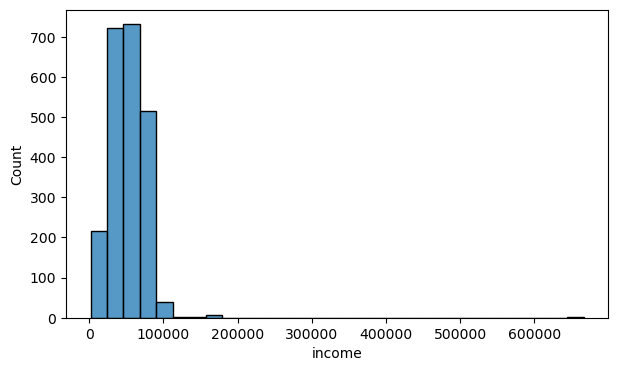

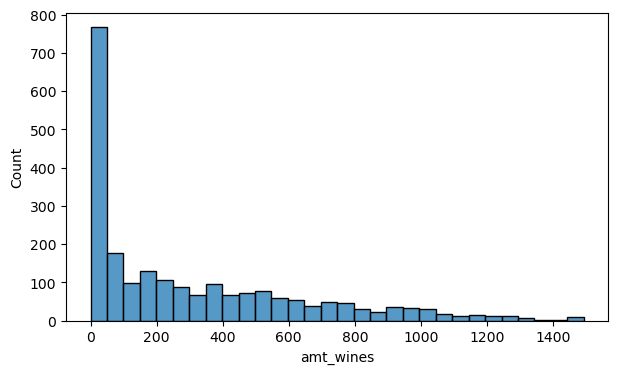

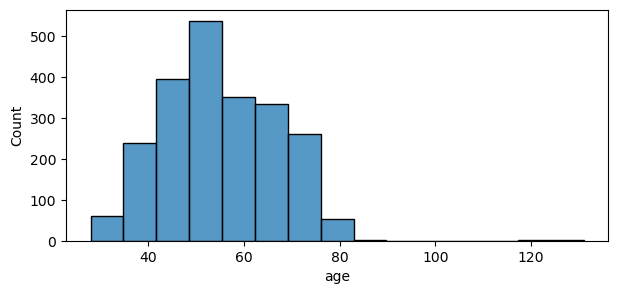

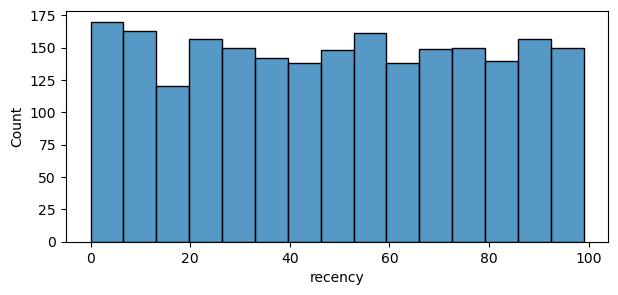

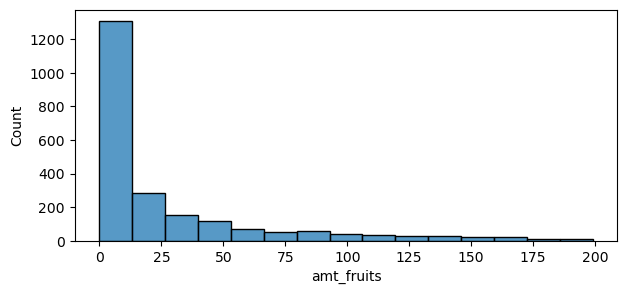

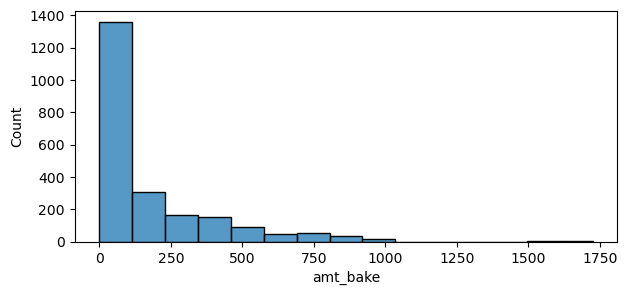

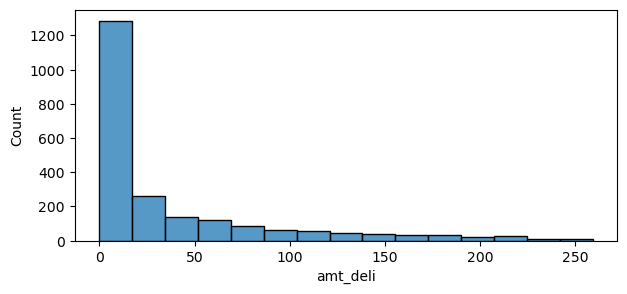

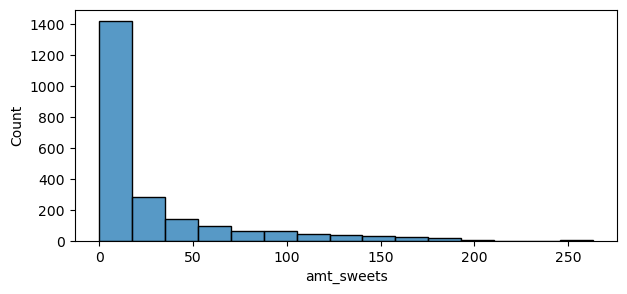

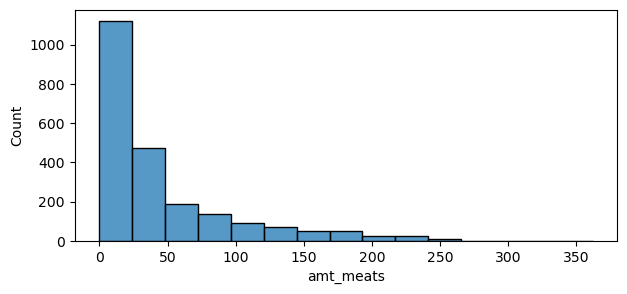

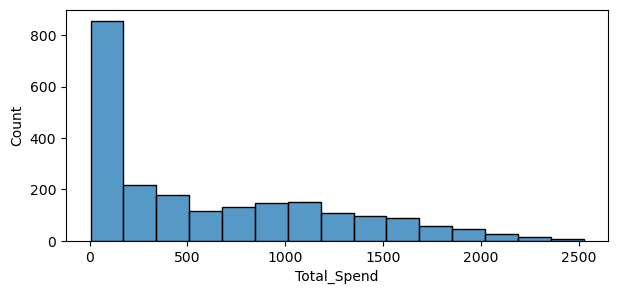

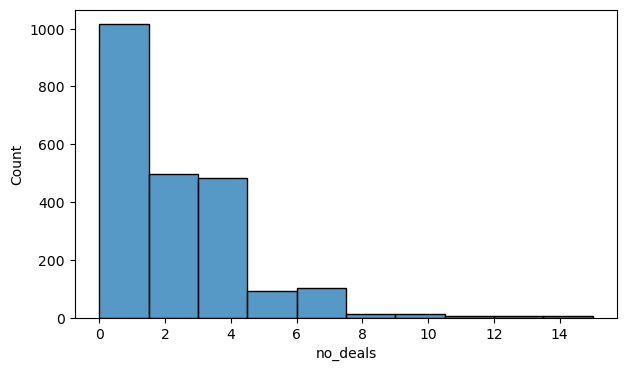

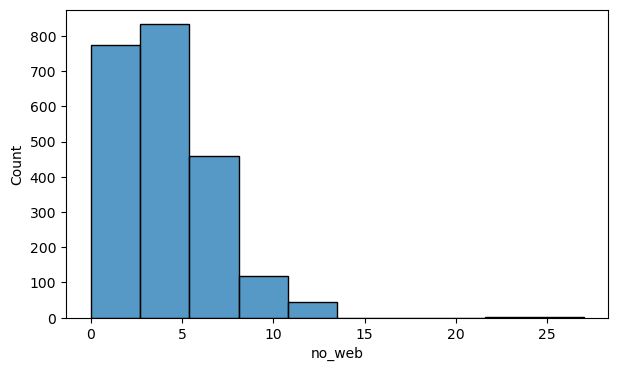

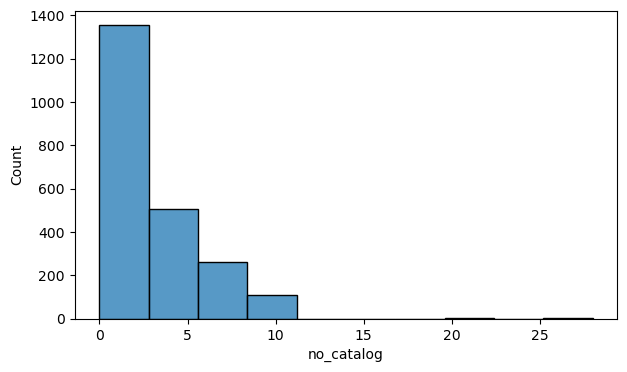

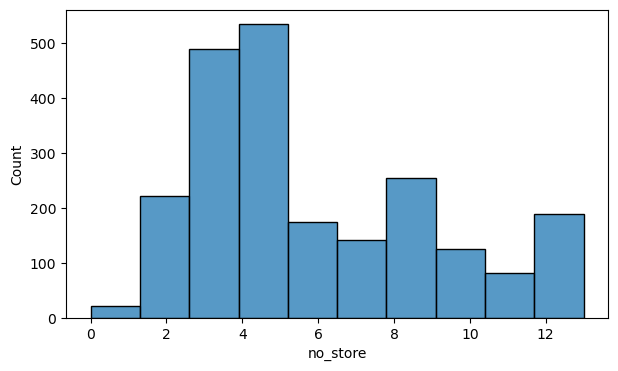

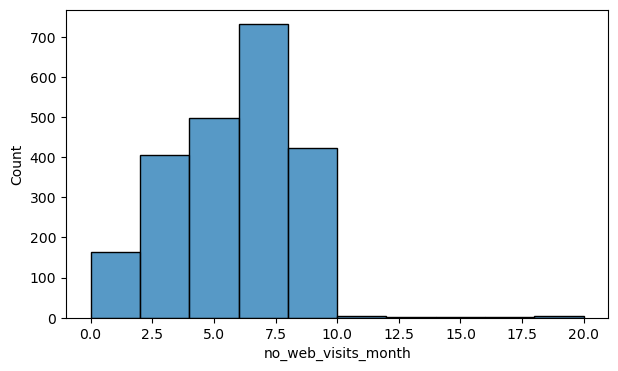

In [ ]:
# Histplot for features with high value_counts, took 30 bins here to visualize

for i in ['income','amt_wines']:
    plt.figure(figsize=(7,4))
    sns.histplot(df[i], kde=False, bins=30, palette='hls')
    plt.xticks(rotation=0)
    plt.show()

# Deriving new feature Total_spend by adding all spendings

df['Total_Spend'] = df[['amt_wines', 'amt_fruits', 'amt_bake', 'amt_deli', 'amt_sweets', 'amt_meats']].sum(axis=1)


cols = ['age','recency','amt_fruits', 'amt_bake', 'amt_deli', 'amt_sweets',
            'amt_meats','Total_Spend']

# Histplot for features with medium value_counts, took 15 bins here to visualize

for i in cols:
    plt.figure(figsize=(7,3))
    sns.histplot(df[i], kde=False, bins=15, palette='hls')
    plt.xticks(rotation=0)
    plt.show()


cols = ['no_deals', 'no_web', 'no_catalog', 'no_store', 'no_web_visits_month']

# Histplot for features with low value_counts, took 10 bins here to visualize

for i in cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[i], kde=False, bins=10, palette='hls')
    plt.xticks(rotation=0)
    plt.show()




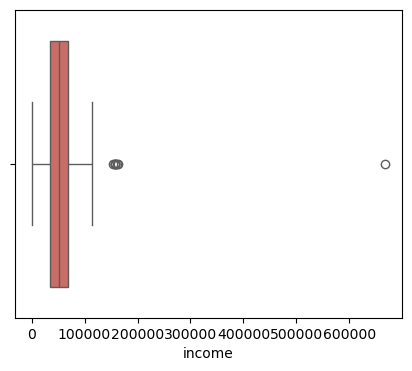

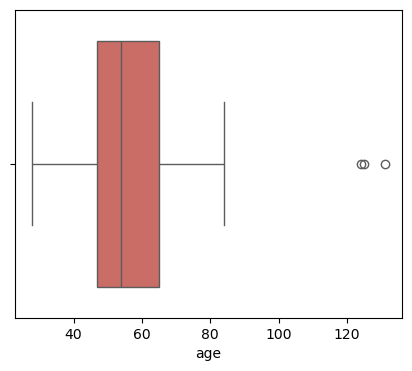

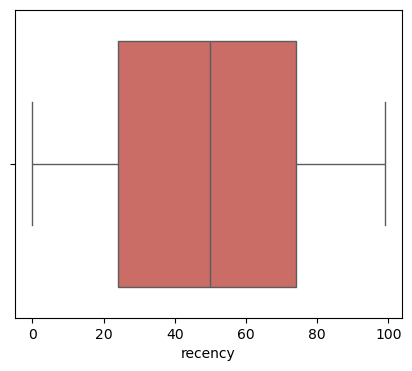

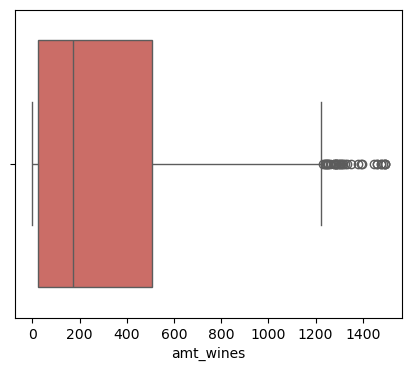

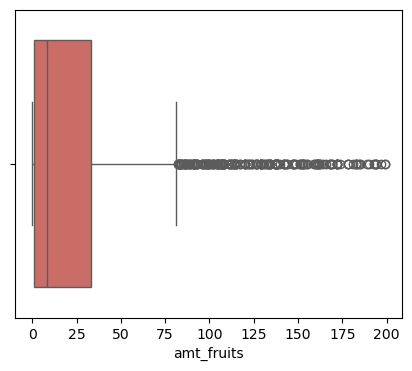

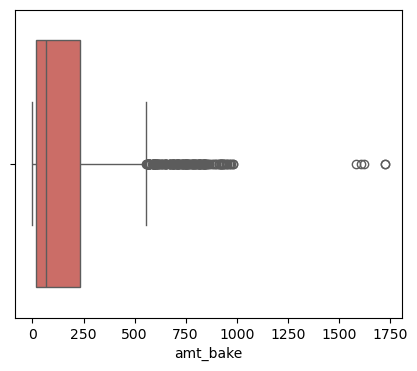

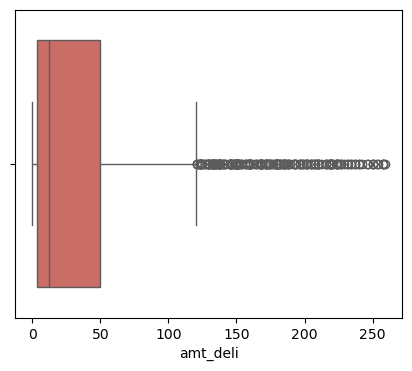

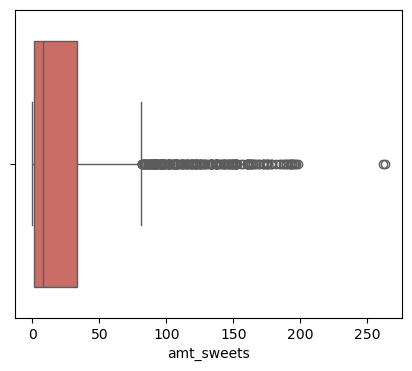

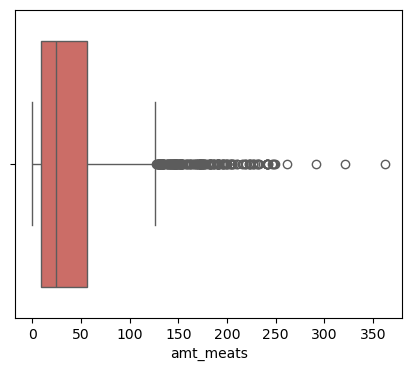

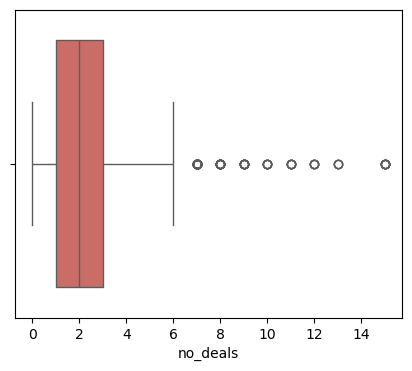

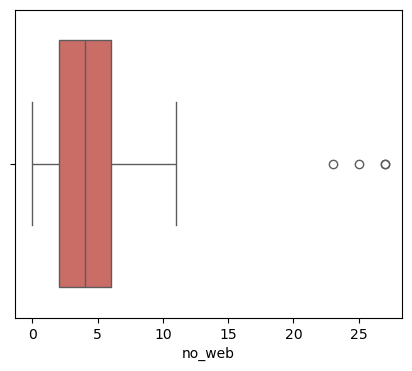

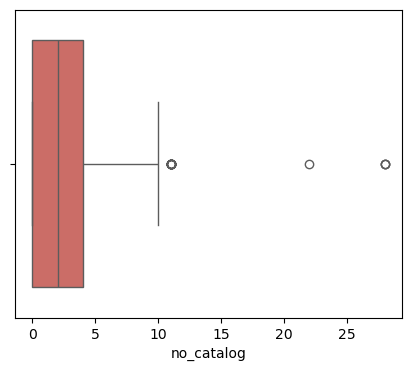

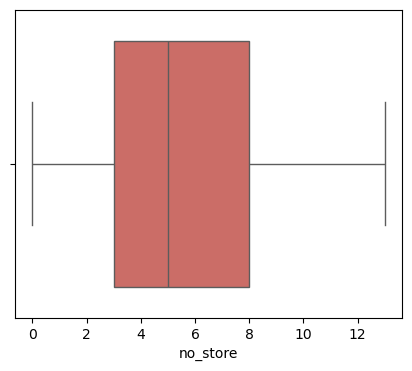

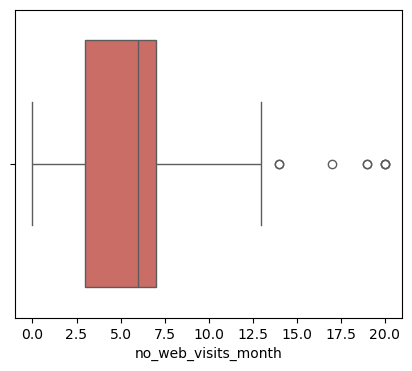

In [ ]:
# Box plots for outliers analysis  numerical columns

cols = ['income','age','recency','amt_wines','amt_fruits', 'amt_bake', 'amt_deli', 'amt_sweets',
            'amt_meats','no_deals', 'no_web', 'no_catalog', 'no_store', 'no_web_visits_month']
for i in cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=0)
    plt.show()

In [ ]:
# Normalized value_counts for binary features

for i in binary_col:
    print(i)
    print(df[i].value_counts(normalize = True))

cmp3_accept
cmp3_accept
0    0.927452
1    0.072548
Name: proportion, dtype: float64
cmp4_accept
cmp4_accept
0    0.925213
1    0.074787
Name: proportion, dtype: float64
cmp5_accept
cmp5_accept
0    0.927452
1    0.072548
Name: proportion, dtype: float64
cmp1_accept
cmp1_accept
0    0.935961
1    0.064039
Name: proportion, dtype: float64
cmp2_accept
cmp2_accept
0    0.986565
1    0.013435
Name: proportion, dtype: float64
complain
complain
0    0.990596
1    0.009404
Name: proportion, dtype: float64
response
response
0    0.851769
1    0.148231
Name: proportion, dtype: float64


In [ ]:
# Label encoding (mapping) for education and marital_status

education_mapping = {'Basic': 5, '2n Cycle': 4, 'Graduation': 3, 'Master': 2, 'PhD': 1}
df['education'] = df['education'].map(education_mapping)

# Custom mapping for Marital_Status
marital_mapping = {'Single': 5, 'Divorced': 4,
                   'Widow': 3, 'Together': 2, 'Married': 1}
df['marital_status'] = df['marital_status'].map(marital_mapping)

In [ ]:
df.corr()

guest_id  education  marital_status    income  kid_le_12  \
guest_id             1.000000   0.003243       -0.020421  0.012012   0.003795   
education            0.003243   1.000000        0.009476 -0.150322   0.053411   
marital_status      -0.020421   0.009476        1.000000 -0.006884  -0.005878   
income               0.012012  -0.150322       -0.006884  1.000000  -0.425782   
kid_le_12            0.003795   0.053411       -0.005878 -0.425782   1.000000   
kid_teen            -0.002846  -0.132969       -0.051404  0.021041  -0.036654   
recency             -0.047752   0.012439        0.013611 -0.003635   0.008674   
amt_wines           -0.023075  -0.214890       -0.003347  0.576458  -0.496564   
amt_fruits           0.003703   0.073671        0.016337  0.427811  -0.372176   
amt_bake            -0.004776  -0.044845        0.026243  0.575911  -0.437136   
amt_deli            -0.025635   0.099572        0.014782  0.437460  -0.387375   
amt_sweets          -0.008433   0.092032        0.009257  0.435120  -0.371070   
amt_meats           -0.014548   0.093145        0.015078  0.319981  -0.348971   
no_deals            -0.035450  -0.034529       -0.040975 -0.082780   0.222382   
no_web              -0.017340  -0.098277       -0.016055  0.379125  -0.362769   
no_catalog          -0.004965  -0.088406       -0.000129  0.586072  -0.502173   
no_store            -0.015115  -0.093638       -0.018149  0.526839  -0.499576   
no_web_visits_month -0.006212   0.057289       -0.005019 -0.549150   0.448396   
cmp3_accept         -0.037622  -0.001347        0.015182 -0.014776   0.012930   
cmp4_accept         -0.025741  -0.058496       -0.001648  0.180894  -0.161861   
cmp5_accept         -0.008979  -0.037462       -0.021785  0.335501  -0.205117   
cmp1_accept         -0.023214   0.002756       -0.014436  0.272854  -0.171661   
cmp2_accept         -0.015218  -0.024242        0.009782  0.087641  -0.081837   
complain             0.033876   0.044466        0.010213 -0.027109   0.040251   
response            -0.026321  -0.097122        0.134475  0.134322  -0.079694   
age                  0.000282  -0.185272       -0.029426  0.164035  -0.231090   
customer_year       -0.005028  -0.054261       -0.004751  0.024724   0.051125   
children             0.000656  -0.058077       -0.041453 -0.289757   0.689777   
Total_Spend         -0.018596  -0.108738        0.012314  0.663327  -0.556565   

                     kid_teen   recency  amt_wines  amt_fruits  amt_bake  \
guest_id            -0.002846 -0.047752  -0.023075    0.003703 -0.004776   
education           -0.132969  0.012439  -0.214890    0.073671 -0.044845   
marital_status      -0.051404  0.013611  -0.003347    0.016337  0.026243   
income               0.021041 -0.003635   0.576458    0.427811  0.575911   
kid_le_12           -0.036654  0.008674  -0.496564   -0.372176 -0.437136   
kid_teen             1.000000  0.017387   0.004641   -0.175268 -0.260538   
recency              0.017387  1.000000   0.015507   -0.005860  0.021870   
amt_wines            0.004641  0.015507   1.000000    0.389796  0.563280   
amt_fruits          -0.175268 -0.005860   0.389796    1.000000  0.543087   
amt_bake            -0.260538  0.021870   0.563280    0.543087  1.000000   
amt_deli            -0.201949 -0.000565   0.401224    0.593576  0.569113   
amt_sweets          -0.161907  0.021407   0.386592    0.567206  0.524427   
amt_meats           -0.019243  0.015896   0.388495    0.390749  0.351037   
no_deals             0.387473  0.001596   0.010935   -0.130890 -0.121840   
no_web               0.154300 -0.009428   0.542329    0.298755  0.295549   
no_catalog          -0.109216  0.023366   0.635971    0.486289  0.724777   
no_store             0.051130  0.000315   0.641923    0.461837  0.479785   
no_web_visits_month  0.132839 -0.019462  -0.321499   -0.416787 -0.539437   
cmp3_accept         -0.044320 -0.033027   0.063817    0.015942  0.019355   
cmp4_accept          0.039049  0.018239   0.373441    0.010177  0.1028

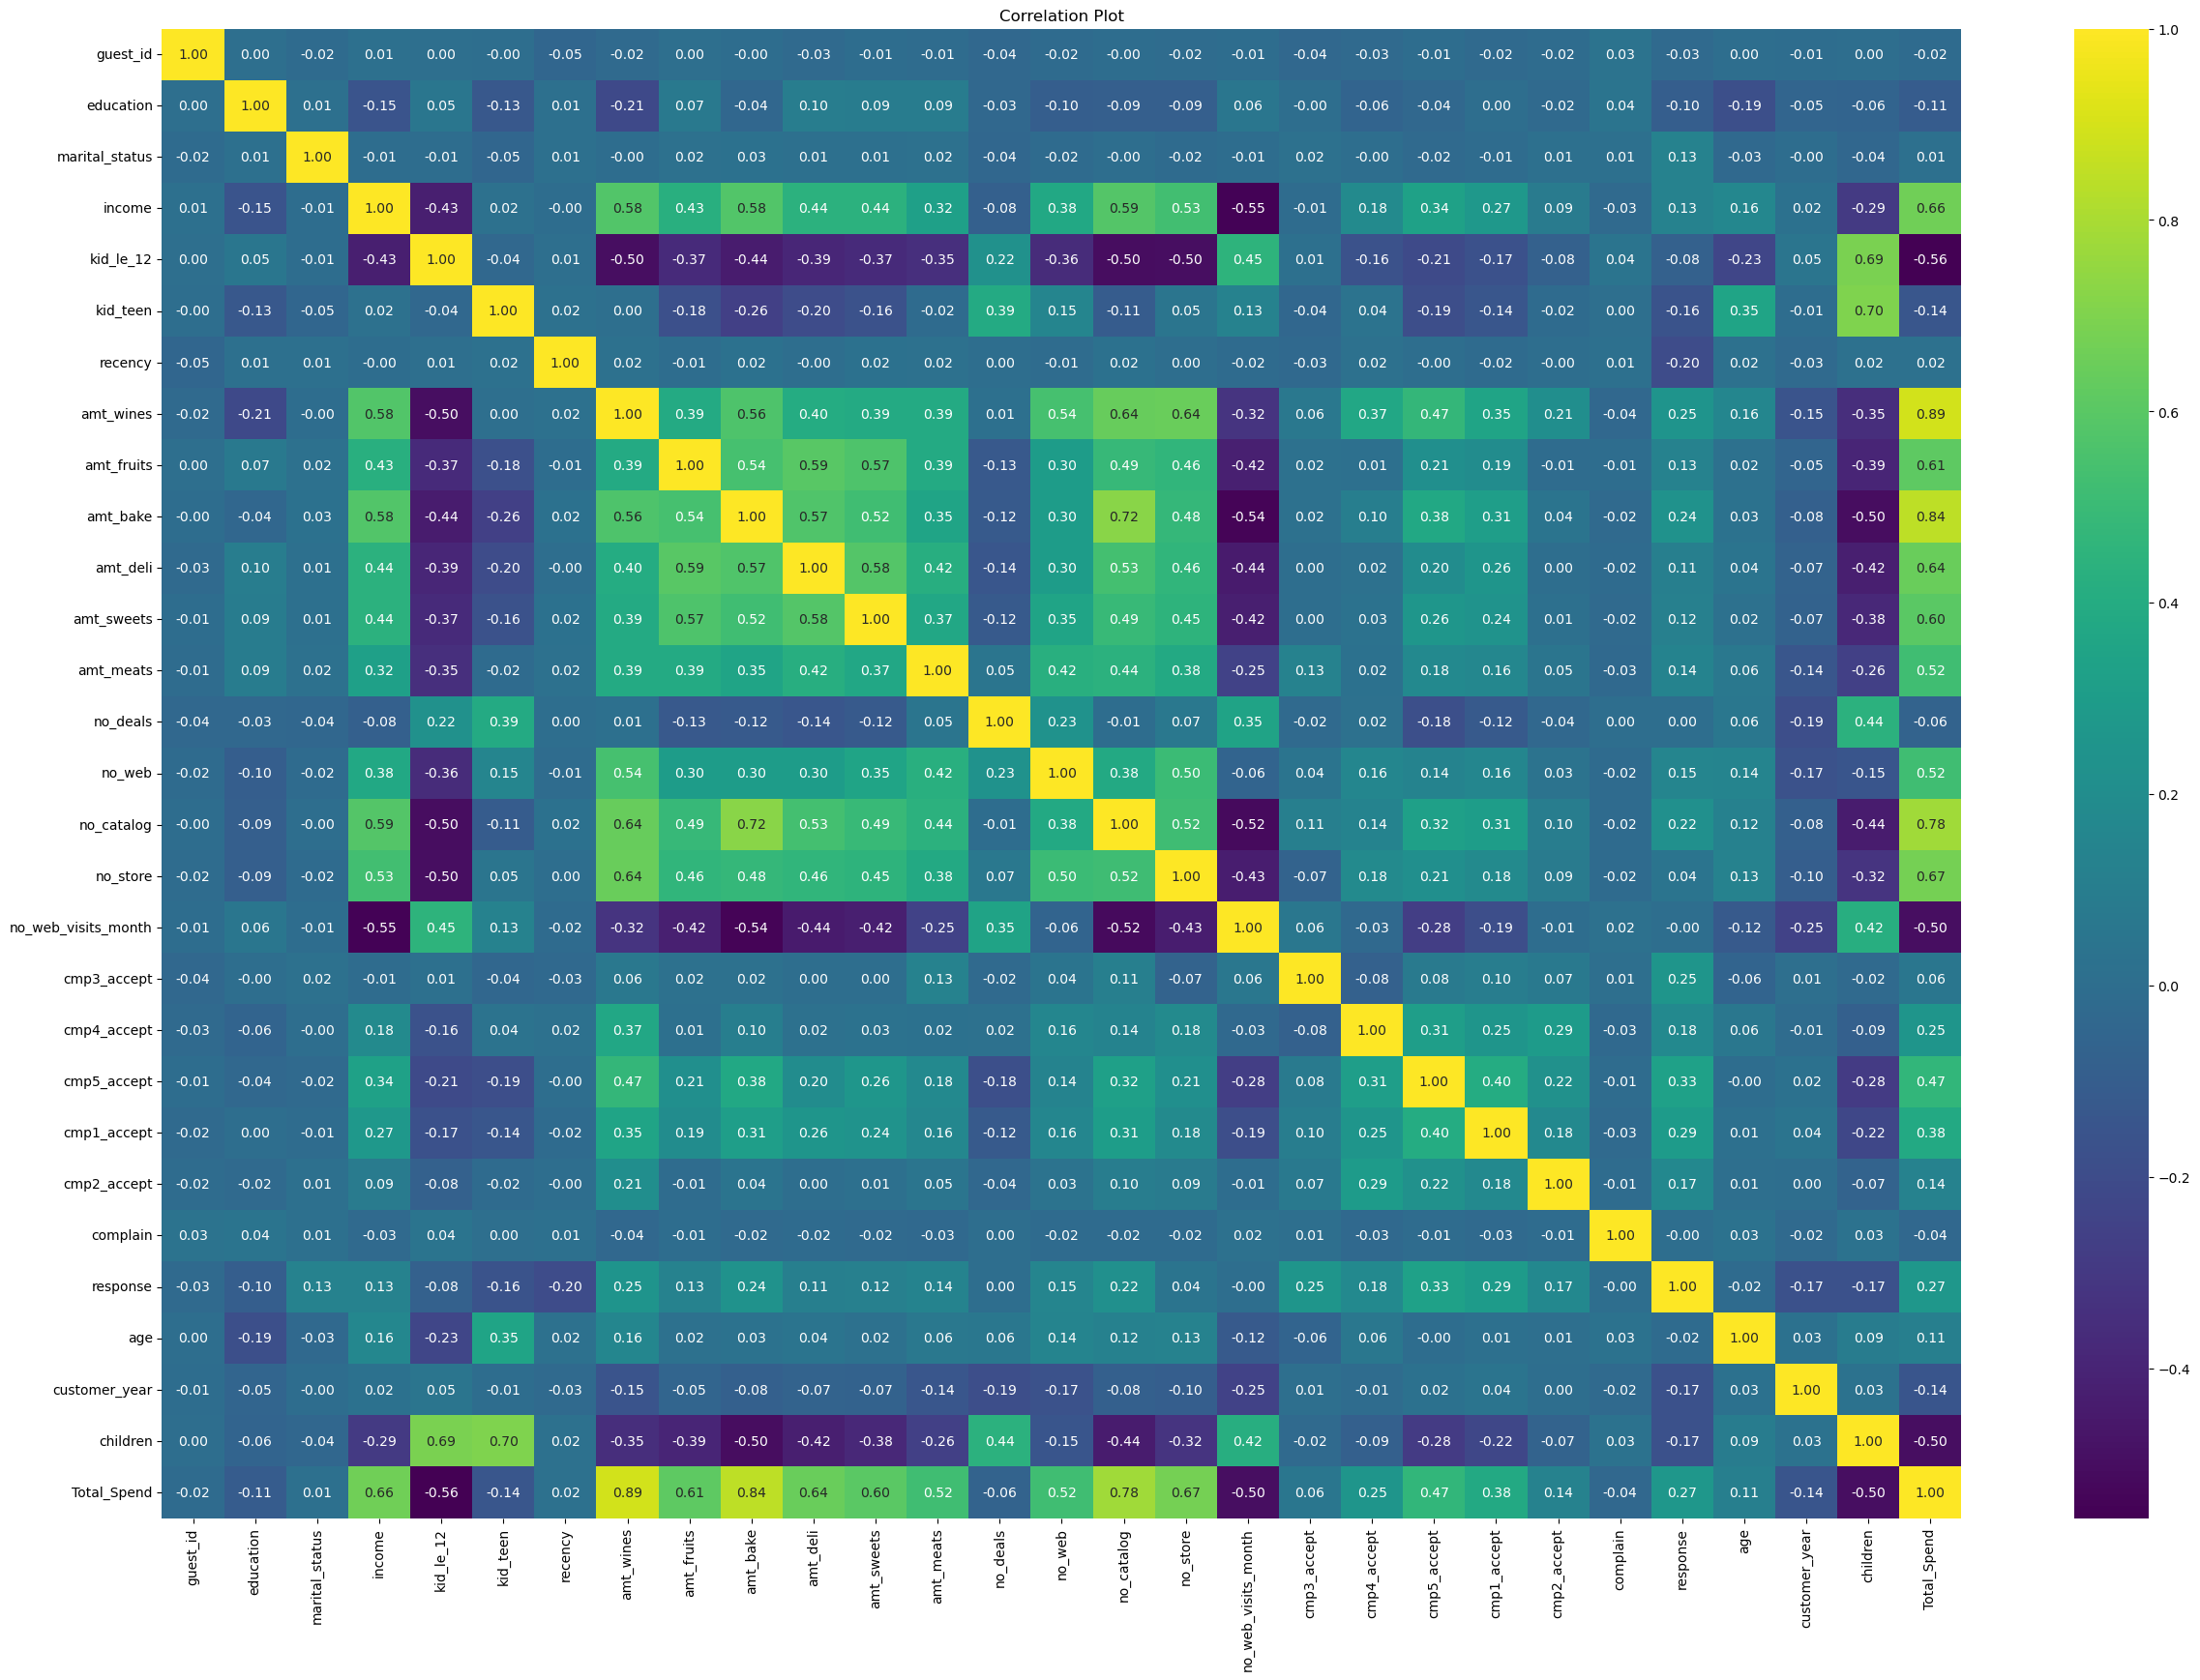

In [ ]:
plt.figure(figsize=(30,20))
dataplot = sns.heatmap(df.corr(), cmap="viridis", annot=True,fmt=".2f")
plt.title("Correlation Plot")
plt.show()

In [ ]:
obj_cols=df.select_dtypes(include='object').columns.tolist()
num_cols=df.select_dtypes(include=['int','float']).columns.tolist()
print("\nCategorical columns:\n")
print(obj_cols)
print("\nNumerical columns:\n")
print(num_cols)


Categorical columns:

[]

Numerical columns:

['guest_id', 'education', 'marital_status', 'income', 'kid_le_12', 'kid_teen', 'recency', 'amt_wines', 'amt_fruits', 'amt_bake', 'amt_deli', 'amt_sweets', 'amt_meats', 'no_deals', 'no_web', 'no_catalog', 'no_store', 'no_web_visits_month', 'cmp3_accept', 'cmp4_accept', 'cmp5_accept', 'cmp1_accept', 'cmp2_accept', 'complain', 'response', 'age', 'customer_year', 'children', 'Total_Spend']


In [ ]:
df.head(10)

guest_id  education  marital_status   income  kid_le_12  kid_teen  recency  \
0      5524          3               5  58138.0          0         0       58   
1      2174          3               5  46344.0          1         1       38   
2      4141          3               2  71613.0          0         0       26   
3      6182          3               2  26646.0          1         0       26   
4      5324          1               1  58293.0          1         0       94   
5      7446          2               2  62513.0          0         1       16   
6       965          3               4  55635.0          0         1       34   
7      6177          1               1  33454.0          1         0       32   
8      4855          1               2  30351.0          1         0       19   
9      5899          1               2   5648.0          1         1       68   

   amt_wines  amt_fruits  amt_bake  amt_deli  amt_sweets  amt_meats  no_deals  \
0        635          88       546       172          88         88         3   
1         11           1         6         2           1          6         2   
2        426          49       127       111          21         42         1   
3         11           4        20        10           3          5         2   
4        173          43       118        46          27         15         5   
5        520          42        98         0          42         14         2   
6        235          65       164        50          49         27         4   
7         76          10        56         3           1         23         2   
8         14           0        24         3           3          2         1   
9         28           0         6         1           1         13         1   

   no_web  no_catalog  no_store  no_web_visits_month  cmp3_accept  \
0       8          10         4                    7            0   
1       1           1         2                    5            0   
2       8           2        10                    4            0   
3       2           0         4                    6            0   
4       5           3         6                    5            0   
5       6           4        10                    6            0   
6       7           3         7                    6            0   
7       4           0         4                    8            0   
8       3           0         2                    9            0   
9       1           0         0                   20            1   

   cmp4_accept  cmp5_accept  cmp1_accept  cmp2_accept  complain  response  \
0            0            0            0            0         0         1   
1            0            0            0            0         0         0   
2            0            0            0            0         0         0   
3            0            0            0            0         0         0   
4            0            0            0            0         0         0   
5            0            0            0            0         0         0   
6            0            0            0            0         0         0   
7            0            0            0            0         0         0   
8            0            0            0            0         0         1   
9            0            0            0            0         0         0   

   age  customer_year  children  Total_Spend  
0   67           2012         0         1617  
1   70           2014         2           27  
2   59           2013         0          776  
3   40           2014         1           53  
4   43           2014         1          422  
5   57           2013         1          716  
6   53           2012         1          590  
7   39           2013         1          169  
8   50           2013         1           46  
9   74           2014         2           49

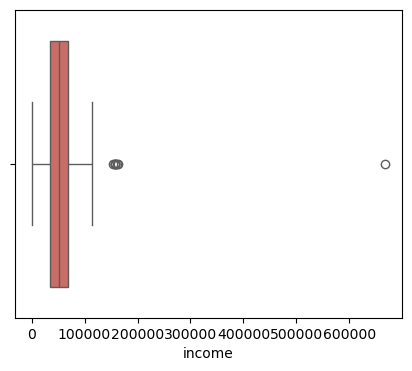

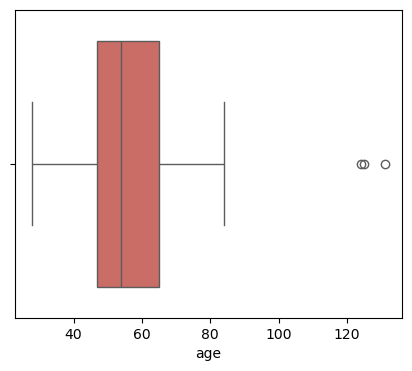

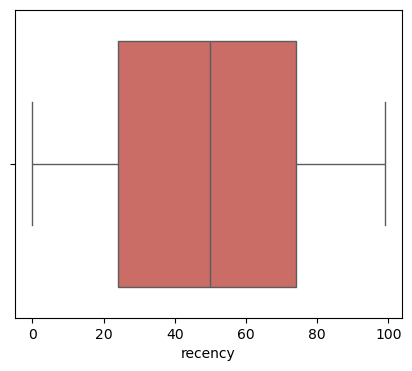

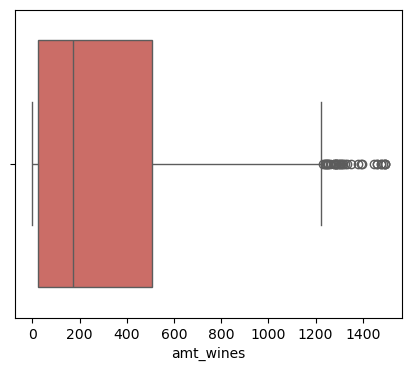

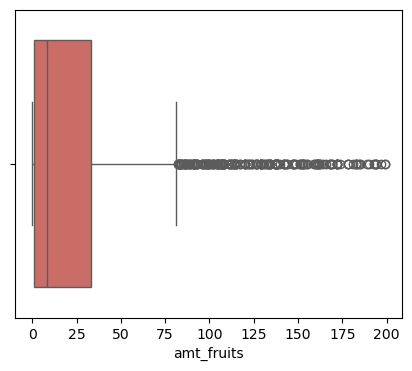

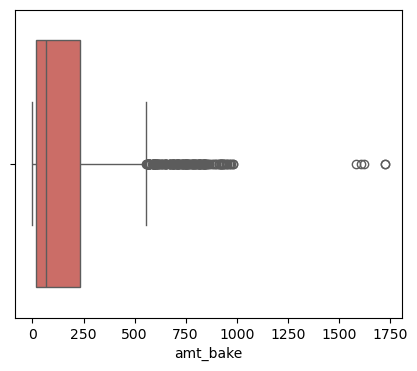

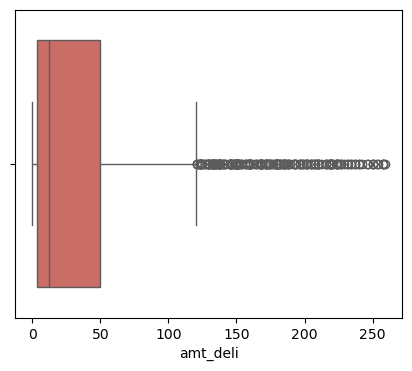

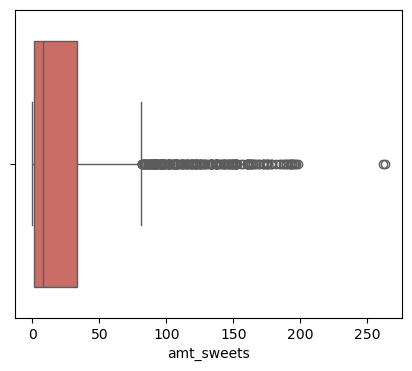

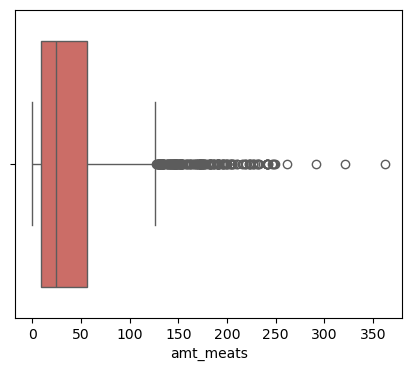

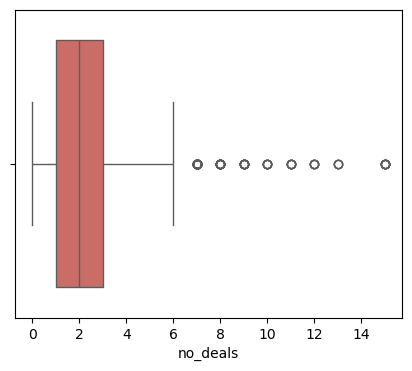

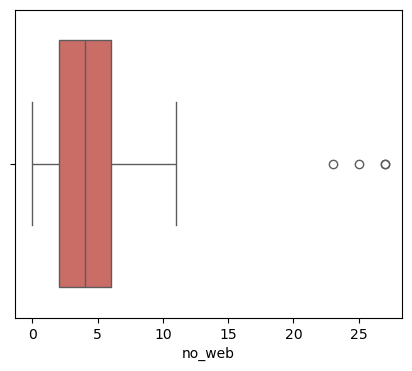

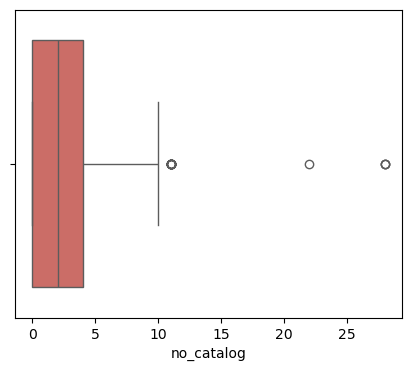

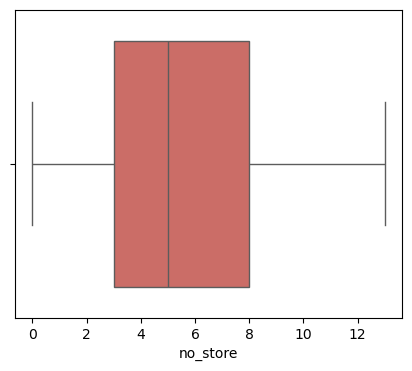

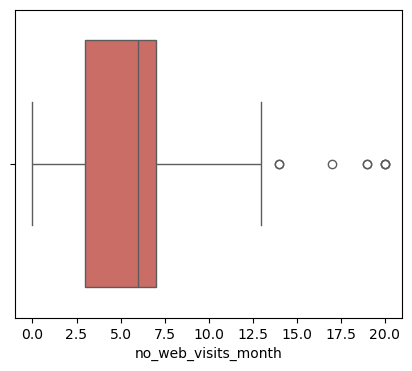

In [ ]:
# Outliers checking before replacing them

cols = ['income','age','recency','amt_wines','amt_fruits', 'amt_bake', 'amt_deli', 'amt_sweets',
            'amt_meats','no_deals', 'no_web', 'no_catalog', 'no_store', 'no_web_visits_month']
for i in cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=0)
    plt.show()

In [ ]:
# Replacing outliers with threshold

import numpy as np
import pandas as pd

# Function to replace outliers with threshold using IQR method
def replace_outliers_with_threshold(df, col):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Define outlier thresholds (min and max)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace outliers with respective thresholds
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# List of columns where you want to replace outliers with thresholds
columns_to_fix_outliers = ['income', 'amt_wines', 'amt_fruits', 'amt_bake', 'amt_deli',
                           'amt_sweets', 'amt_meats', 'no_deals', 'no_web',
                           'no_catalog', 'no_store', 'no_web_visits_month', 'recency', 'age']

# Apply the function to each column in df_n
for col in columns_to_fix_outliers:
    replace_outliers_with_threshold(df, col)

# Check the updated DataFrame
print(df[columns_to_fix_outliers].head())


    income  amt_wines  amt_fruits  amt_bake  amt_deli  amt_sweets  amt_meats  \
0  58138.0      635.0        81.0     546.0     120.5        81.0       88.0   
1  46344.0       11.0         1.0       6.0       2.0         1.0        6.0   
2  71613.0      426.0        49.0     127.0     111.0        21.0       42.0   
3  26646.0       11.0         4.0      20.0      10.0         3.0        5.0   
4  58293.0      173.0        43.0     118.0      46.0        27.0       15.0   

   no_deals  no_web  no_catalog  no_store  no_web_visits_month  recency   age  
0       3.0     8.0        10.0       4.0                  7.0     58.0  67.0  
1       2.0     1.0         1.0       2.0                  5.0     38.0  70.0  
2       1.0     8.0         2.0      10.0                  4.0     26.0  59.0  
3       2.0     2.0         0.0       4.0                  6.0     26.0  40.0  
4       5.0     5.0         3.0       6.0                  5.0     94.0  43.0  


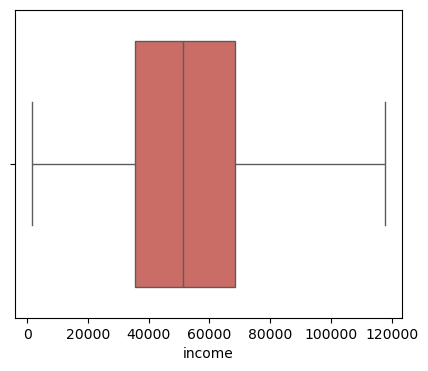

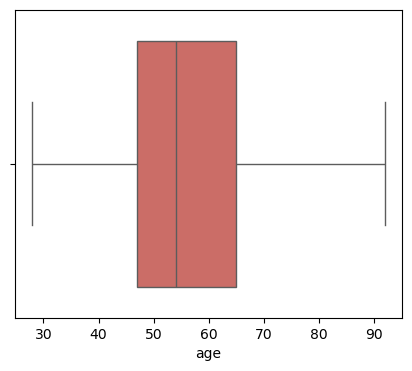

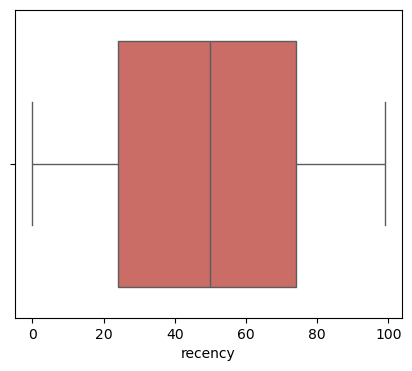

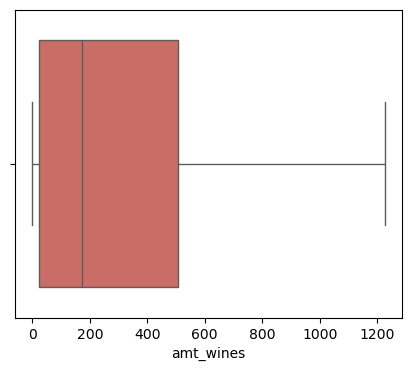

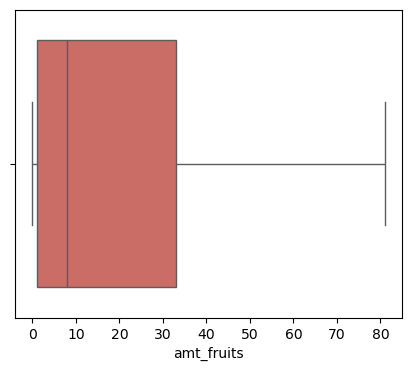

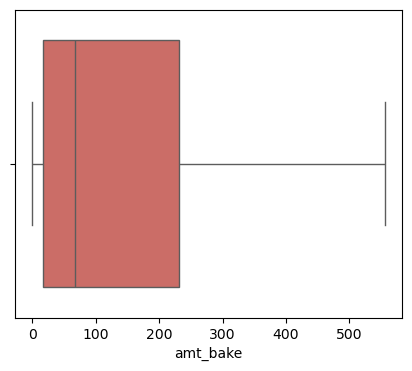

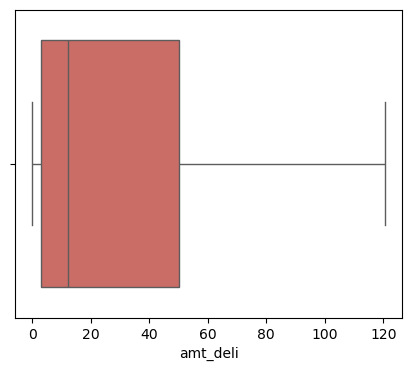

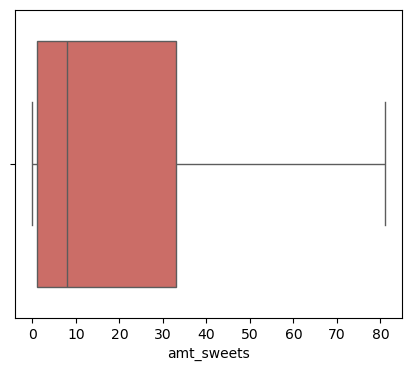

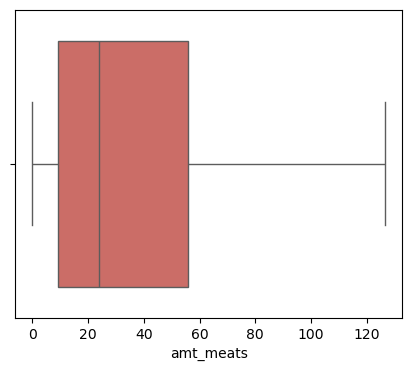

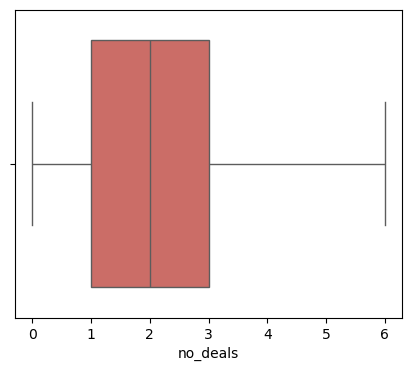

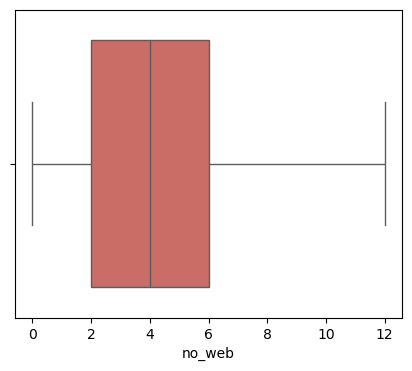

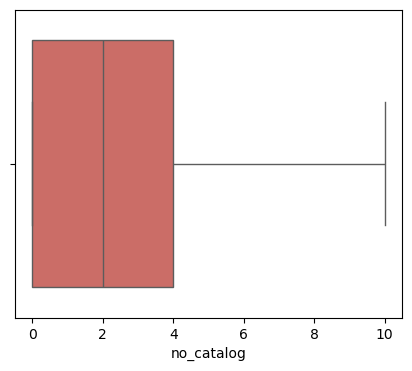

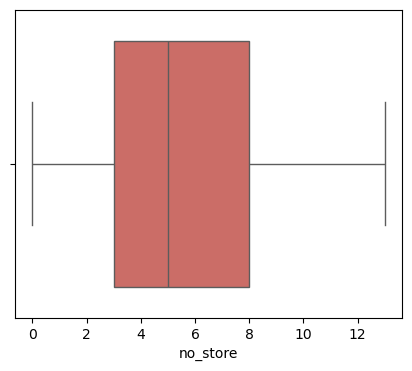

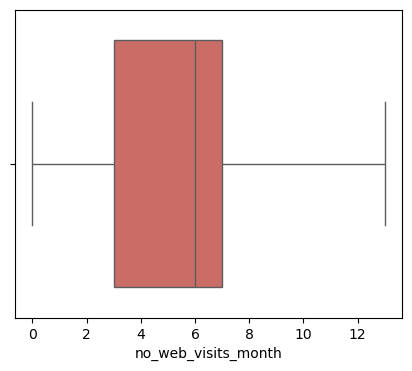

In [ ]:
# Checking Outliers after replacement

cols = ['income','age','recency','amt_wines','amt_fruits', 'amt_bake', 'amt_deli', 'amt_sweets',
            'amt_meats','no_deals', 'no_web', 'no_catalog', 'no_store', 'no_web_visits_month']
for i in cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=0)
    plt.show()

In [ ]:
# copying df for further use

df_n  = df.copy()
df2 = df.copy()
df3 = df.copy()

In [ ]:
# Features for clustering

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Feature Engineering
df_n['Total_Spend'] = df_n[['amt_wines', 'amt_fruits', 'amt_bake', 'amt_deli', 'amt_sweets', 'amt_meats']].sum(axis=1)

# Select features for clustering
features_for_clustering = [
    'income',
    'Total_Spend',
    'age',
    'no_deals',
    'no_web_visits_month',
    'no_web',
    'no_catalog',
    'no_store',
    'kid_le_12',
    'kid_teen',
    'children','amt_wines', 'amt_fruits', 'amt_bake', 'amt_deli', 'amt_sweets', 'amt_meats'
]


# Create DataFrames for scaling and non-scaling features
df_numerical = df_n[features_for_clustering]
# Convert scaled numerical features back to DataFrame
df_clustering = df_numerical

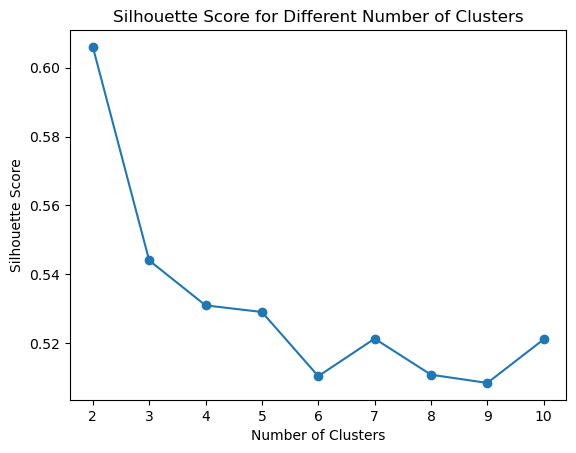

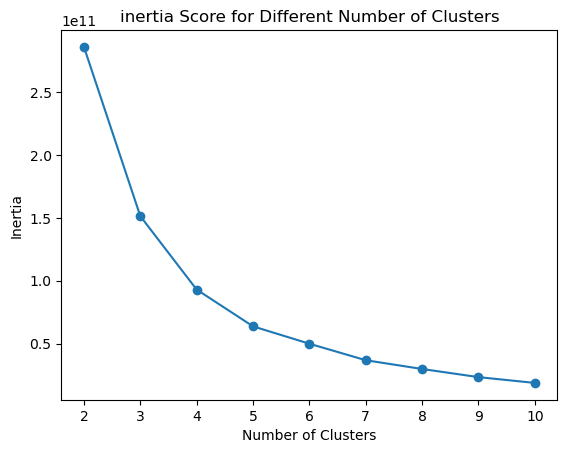

In [ ]:
# Using K-means clustering

from sklearn.cluster import KMeans

range_n_clusters = list(range(2, 11))
silhouette_scores = []
inertia = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(df_clustering)
    silhouette_avg = silhouette_score(df_clustering, labels)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_avg)
# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Number of Clusters')
plt.show()


plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('inertia Score for Different Number of Clusters')

plt.show()


In [ ]:
print(silhouette_scores)

[0.6060656251595171, 0.5439867158921389, 0.5309255994503116, 0.5290080026379934, 0.5103488989133946, 0.5212486155478401, 0.5107659751581202, 0.5083818510425225, 0.5210622049641203]


In [ ]:
# Calculating WCSS

from sklearn.cluster import KMeans

# List to store WCSS values for different number of clusters
wcss = []

# Loop through a range of cluster numbers
for i in range(1, 11):  # You can adjust the range as needed
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_clustering)  # Fit the KMeans model to your data
    wcss.append(kmeans.inertia_)  # Store the inertia (WCSS) value

# Output WCSS values
print(wcss)


[983524745725.8154, 286087855581.05615, 151436221711.32416, 92985209346.65335, 63737385907.28557, 49917867976.93445, 36788309696.82797, 29810176695.794052, 23341099512.27092, 18725941374.529976]


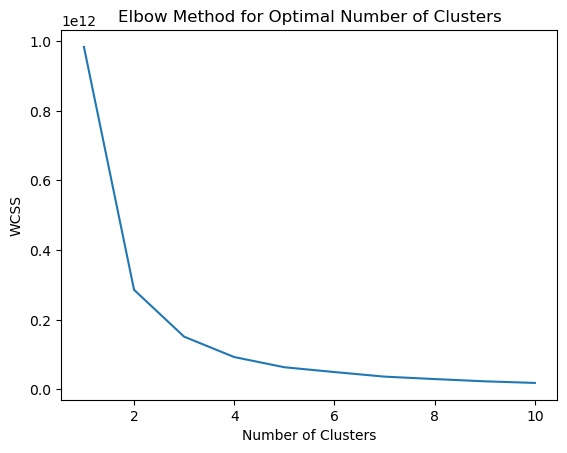

In [ ]:
import matplotlib.pyplot as plt

# Plot the WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Silhouette Score for 5 clusters: 0.5309255994503116


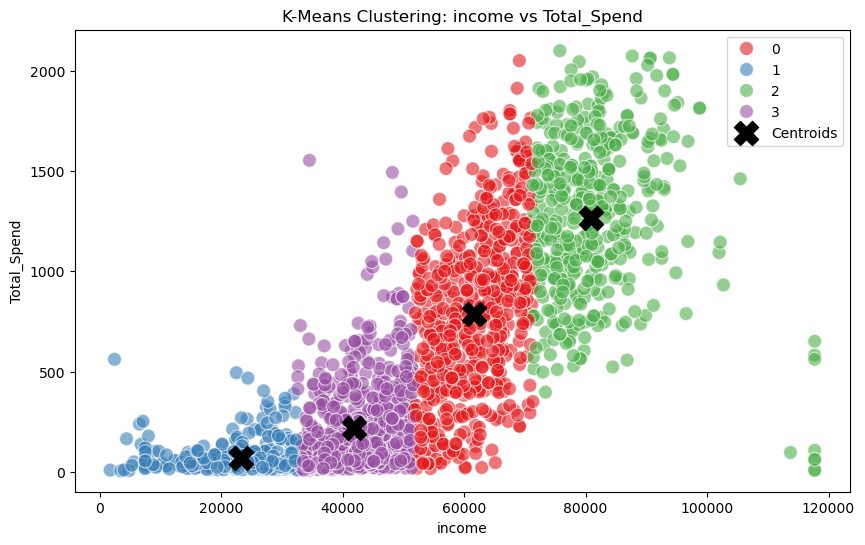

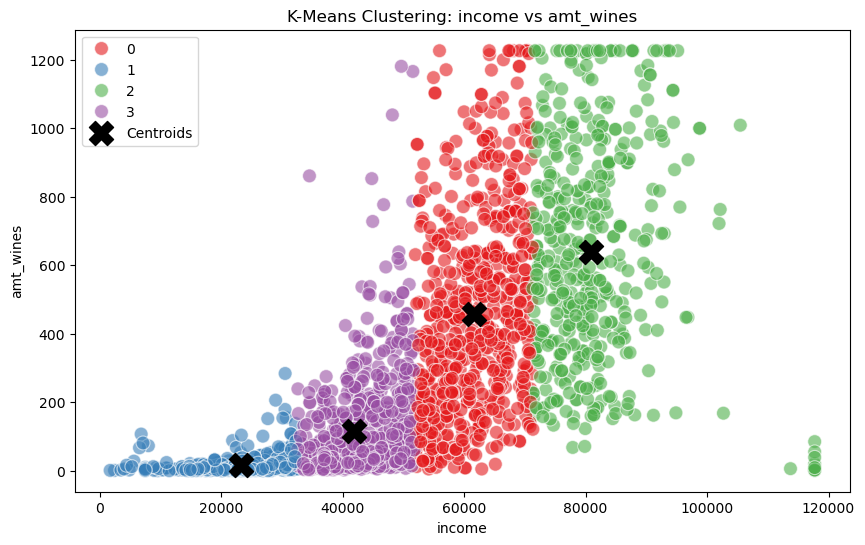

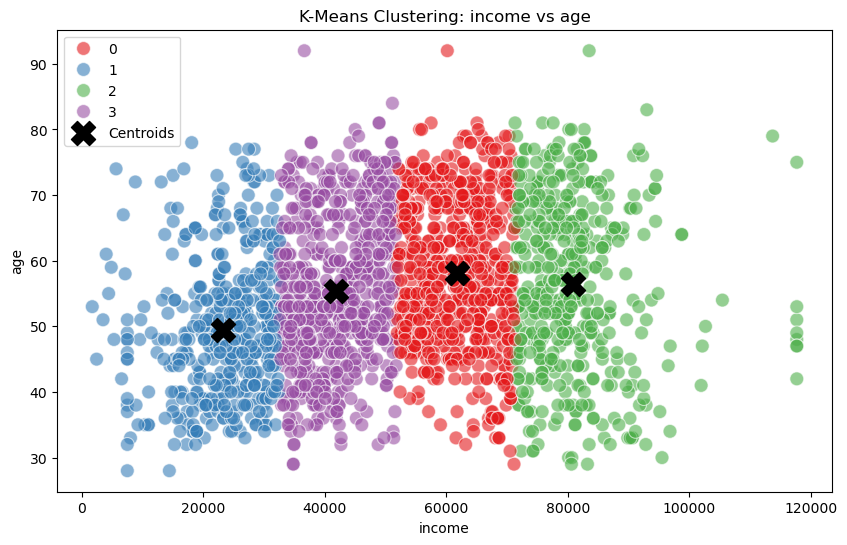

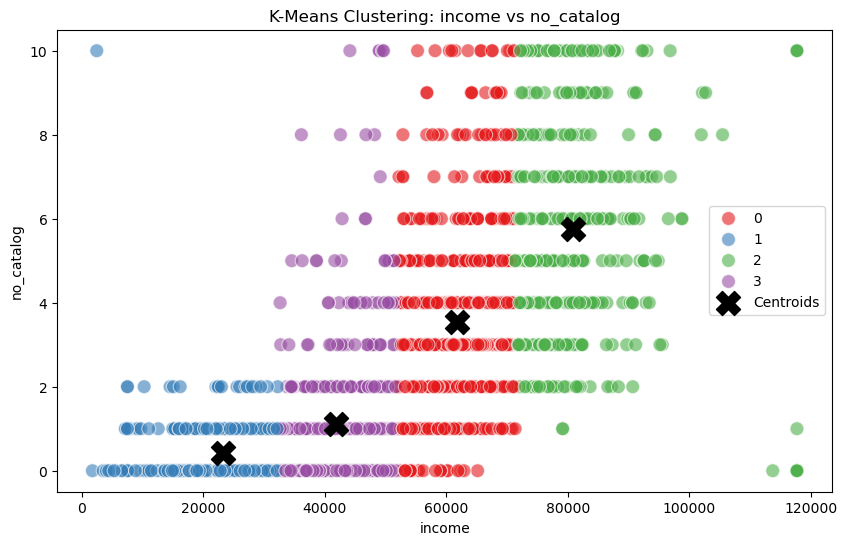

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize KMeans with 5 clusters and a random seed of 42
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model and assign cluster labels to the data
df_n['Segment'] = kmeans.fit_predict(df_clustering)

# Get the labels for the silhouette score
labels = df_n['Segment']

# Calculate the silhouette score
silhouette_avg = silhouette_score(df_clustering, labels)
print(f"Silhouette Score for 5 clusters: {silhouette_avg}")

# List of feature pairs you want to plot
feature_pairs = [
    ('income', 'Total_Spend'),
    ('income','amt_wines'),
    ('income','age'),
    ('income', 'no_catalog')
]

# Loop over feature pairs and create scatter plots
for pair in feature_pairs:
    plt.figure(figsize=(10, 6))

    # Create a scatter plot using seaborn for each feature pair
    sns.scatterplot(x=pair[0], y=pair[1], hue='Segment', data=df_n, palette='Set1', s=100, alpha=0.6)

    # Plot the centroids of each cluster
    centroids = kmeans.cluster_centers_

    # Select the indices corresponding to the current feature pair
    plt.scatter(centroids[:, df_clustering.columns.get_loc(pair[0])],
                centroids[:, df_clustering.columns.get_loc(pair[1])],
                s=300, c='black', marker='X', label='Centroids')

    # Add plot title and axis labels
    plt.title(f'K-Means Clustering: {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])

    # Show the legend for the clusters and centroids
    plt.legend()

    # Display the plot
    plt.show()


In [ ]:
kmeans = KMeans(n_clusters = 4, random_state=42)
df_n['Segment'] = kmeans.fit_predict(df_clustering)
labels = kmeans.fit_predict(df_clustering)
print(silhouette_score(df_clustering, labels))

0.5309255994503116


Cluster Size:
Segment
3    674
0    643
2    460
1    456
Name: count, dtype: int64

Cluster Feature Means:
            guest_id  education  marital_status        income  kid_le_12  \
Segment                                                                    
0        5615.847589   2.379471        2.423017  61715.189736   0.219285   
1        5737.348684   3.039474        2.541667  23300.285088   0.782895   
2        5609.660870   2.476087        2.521739  80927.840217   0.076087   
3        5470.118694   2.405045        2.531157  41900.783383   0.681009   

         kid_teen    recency   amt_wines  amt_fruits    amt_bake   amt_deli  \
Segment                                                                       
0        0.757387  49.101089  456.361586   28.091757  179.306376  39.526439   
1        0.208333  48.348684   17.118421    5.495614   18.214912   7.828947   
2        0.250000  49.467391  640.086957   48.865217  394.121739  73.921739   
3        0.642433  49.596439  117.492582

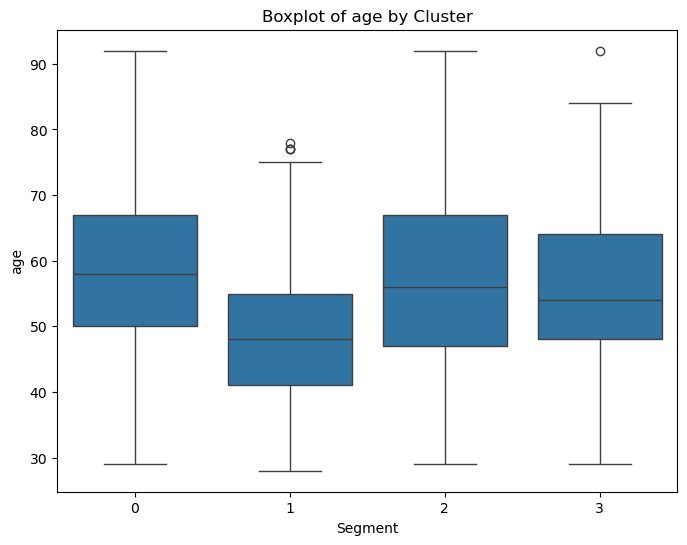

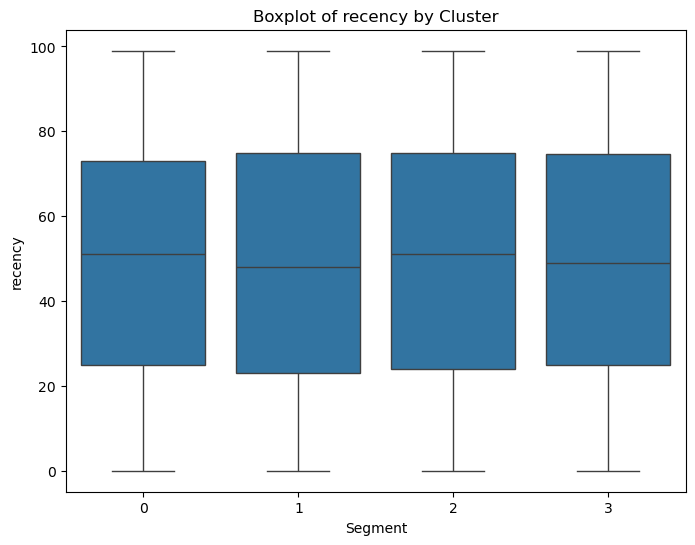

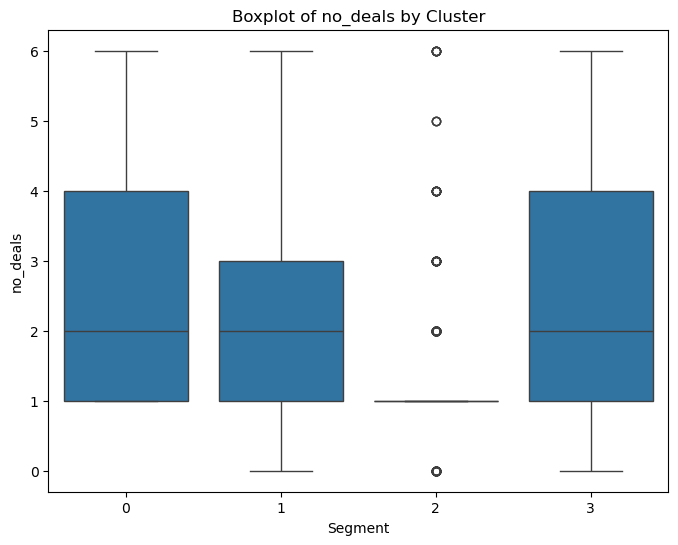

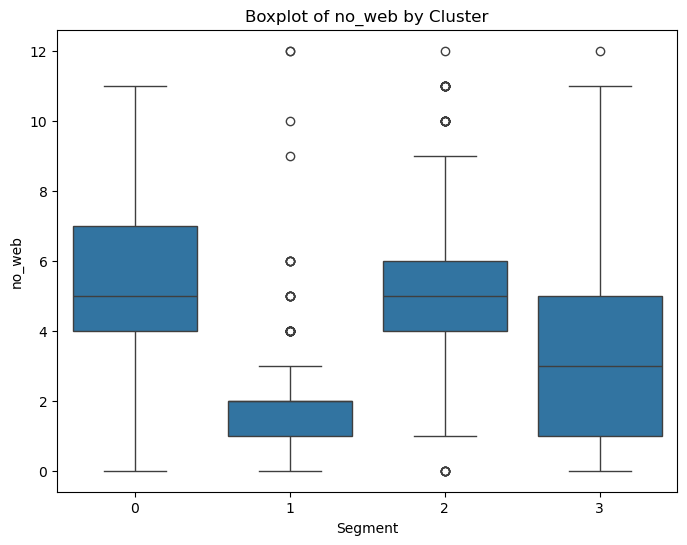

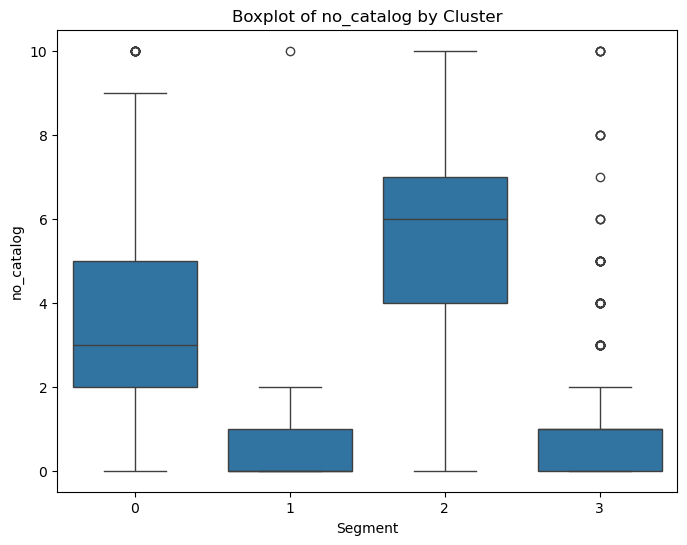

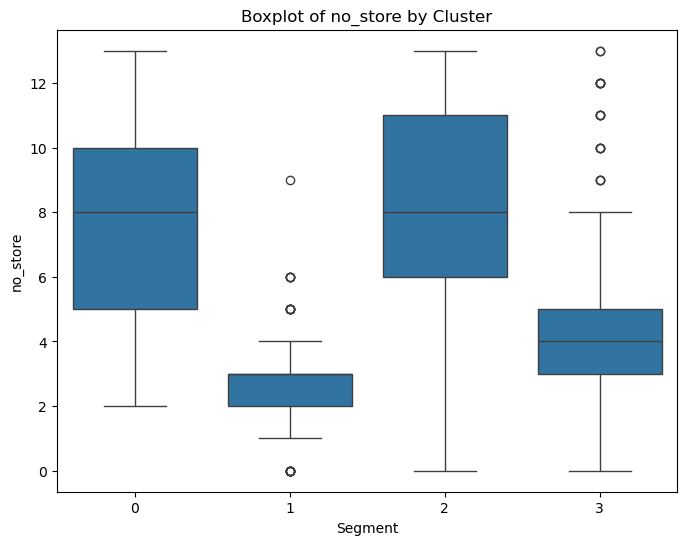

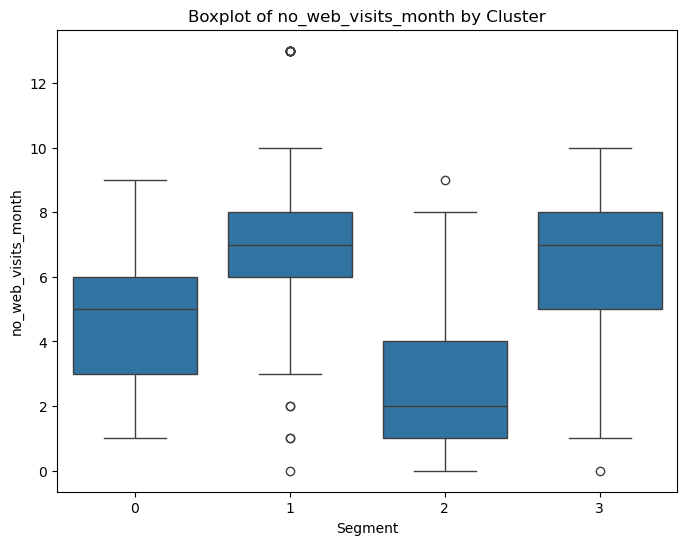

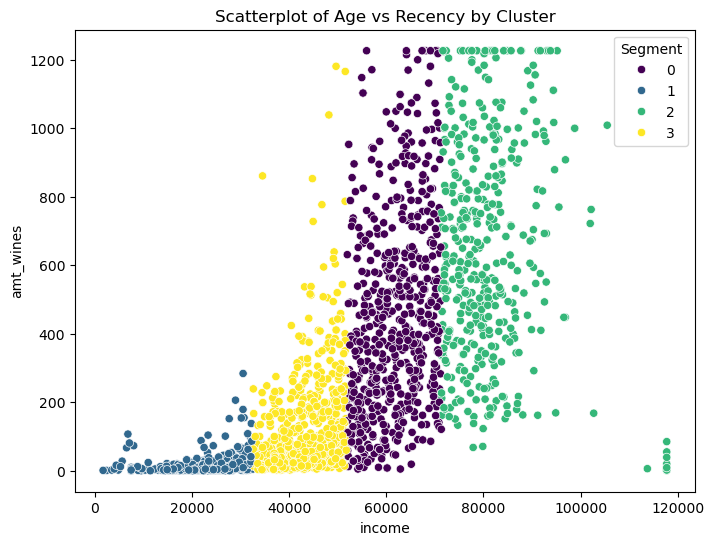

In [ ]:

import pandas as pd

# Assuming 'df' is your dataset, and 'Segment' is the cluster label column

# 1. Basic Cluster Size
cluster_size = df_n['Segment'].value_counts()
print("Cluster Size:")
print(cluster_size)

# 2. Cluster Means (centroid-like analysis)
# Get the mean value of each feature for each cluster
cluster_means = df_n.groupby('Segment').mean()
print("\nCluster Feature Means:")
print(cluster_means)

# 3. Statistical Summary for each cluster
cluster_summary = df_n.groupby('Segment').describe()
print("\nCluster Summary Statistics:")
print(cluster_summary)

# 4. Visualizations

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for each feature per cluster
features_to_plot = ['age', 'recency', 'no_deals', 'no_web', 'no_catalog', 'no_store', 'no_web_visits_month']
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Segment', y=feature, data=df_n)
    plt.title(f'Boxplot of {feature} by Cluster')
    plt.show()

# Scatter Plot for two key features (age vs recency) colored by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='income', y='amt_wines', hue='Segment', data=df_n, palette='viridis')
plt.title('Scatterplot of Age vs Recency by Cluster')
plt.show()


In [ ]:
df_n.describe()

guest_id    education  marital_status         income    kid_le_12  \
count   2233.000000  2233.000000     2233.000000    2233.000000  2233.000000   
mean    5595.398567     2.541872        2.500224   51847.618227     0.444245   
std     3243.198115     1.004099        1.588242   20980.960886     0.538528   
min        0.000000     1.000000        1.000000    1730.000000     0.000000   
25%     2831.000000     2.000000        1.000000   35441.000000     0.000000   
50%     5462.000000     3.000000        2.000000   51373.000000     0.000000   
75%     8430.000000     3.000000        4.000000   68352.000000     1.000000   
max    11191.000000     5.000000        5.000000  117718.500000     2.000000   

          kid_teen      recency    amt_wines   amt_fruits     amt_bake  \
count  2233.000000  2233.000000  2233.000000  2233.000000  2233.000000   
mean      0.506046    49.172414   302.228616    21.672638   150.986117   
std       0.544675    28.962114   331.467492    27.240628   178.858733   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000    24.000000    24.000000     1.000000    16.000000   
50%       0.000000    50.000000   173.000000     8.000000    67.000000   
75%       1.000000    74.000000   505.000000    33.000000   232.000000   
max       2.000000    99.000000  1226.500000    81.000000   556.000000   

          amt_deli   amt_sweets    amt_meats     no_deals       no_web  \
count  2233.000000  2233.000000  2233.000000  2233.000000  2233.000000   
mean     32.094716    21.967309    39.424317     2.211375     4.057322   
std      40.318191    27.555261    39.900757     1.536916     2.644961   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.000000     1.000000     9.000000     1.000000     2.000000   
50%      12.000000     8.000000    24.000000     2.000000     4.000000   
75%      50.000000    33.000000    56.000000     3.000000     6.000000   
max     120.500000    81.000000   126.500000     6.000000    12.000000   

        no_catalog    no_store  no_web_visits_month  cmp3_accept  cmp4_accept  \
count  2233.000000  2233.00000          2233.000000  2233.000000  2233.000000   
mean      2.623824     5.79176             5.298701     0.072548     0.074787   
std       2.732718     3.25473             2.347095     0.259451     0.263107   
min       0.000000     0.00000             0.000000     0.000000     0.000000   
25%       0.000000     3.00000             3.000000     0.000000     0.000000   
50%       2.000000     5.00000             6.000000     0.000000     0.000000   
75%       4.000000     8.00000             7.000000     0.000000     0.000000   
max      10.000000    13.00000            13.000000     1.000000     1.000000   

       cmp5_accept  cmp1_accept  cmp2_accept     complain     response  \
count  2233.000000  2233.000000  2233.000000  2233.000000  2233.000000   
mean      0.072548     0.064039     0.013435     0.009404     0.148231   
std       0.259451     0.244878     0.115153     0.096541     0.355408   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               age  customer_year     children  Total_Spend      Segment  
count  2233.000000    2233.000000  2233.000000  2233.000000  2233.000000  
mean     55.162562    2013.028213     0.950291   568.373712     1.521720  
std      11.766203       0.683662     0.751785   547.553818     1.195721  
min      28.000000    2012.000000     0.000000     5.000000     0.000000  
25%      47.000000    2013.000000     0.000000    68.000000     0.000000  
50%      54.000000    2013.000000     1.000000   393.000000     2.000000  
75%      65.000000    2013.000000 

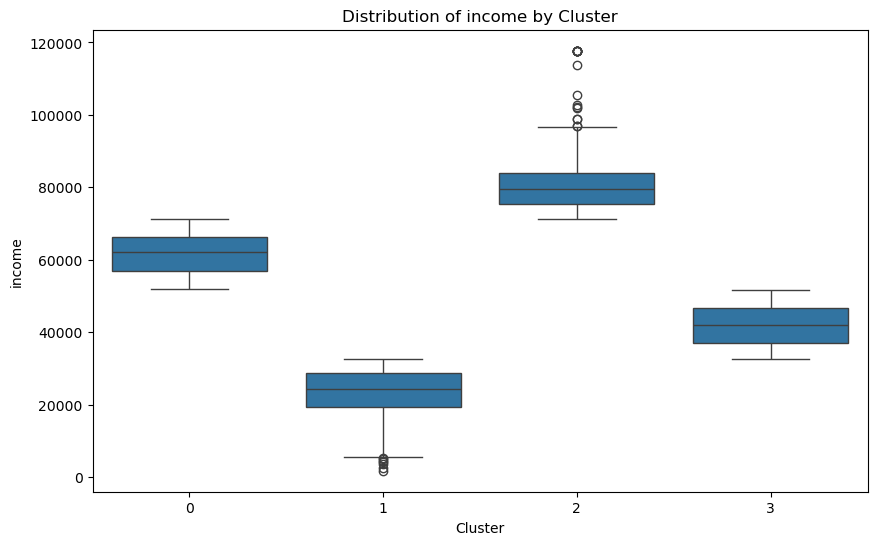

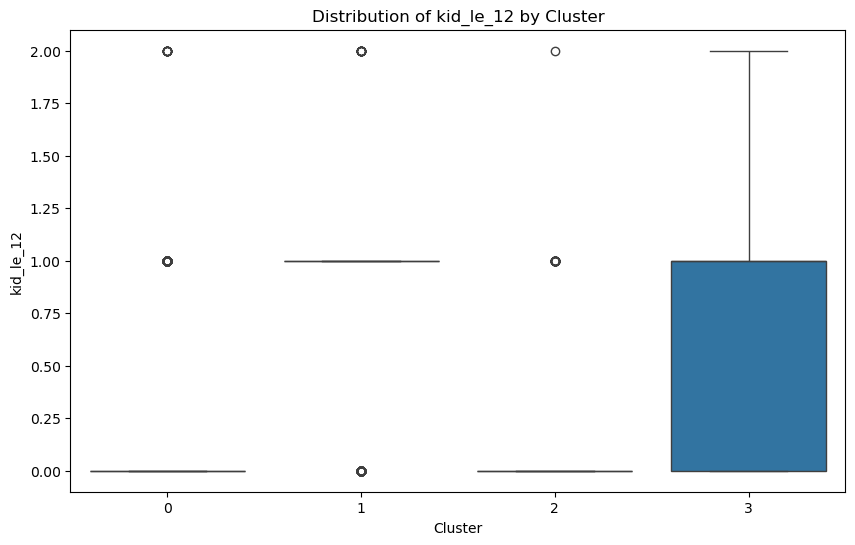

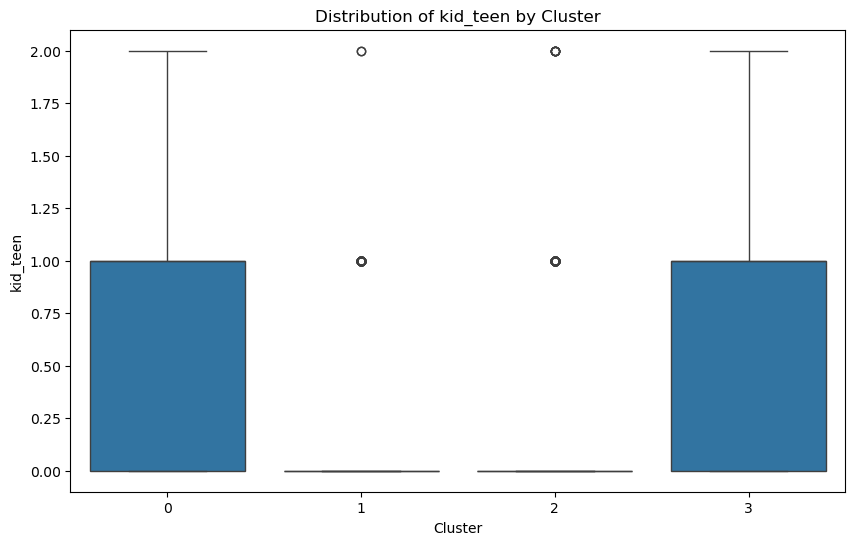

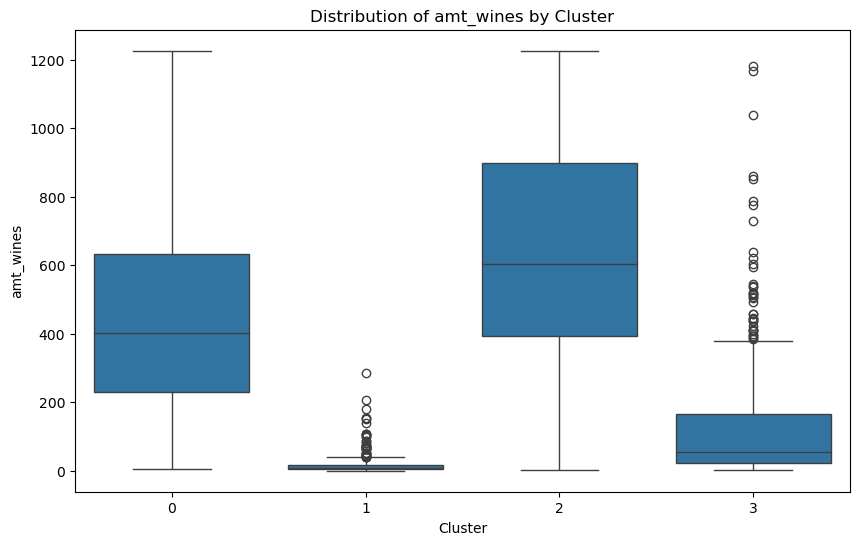

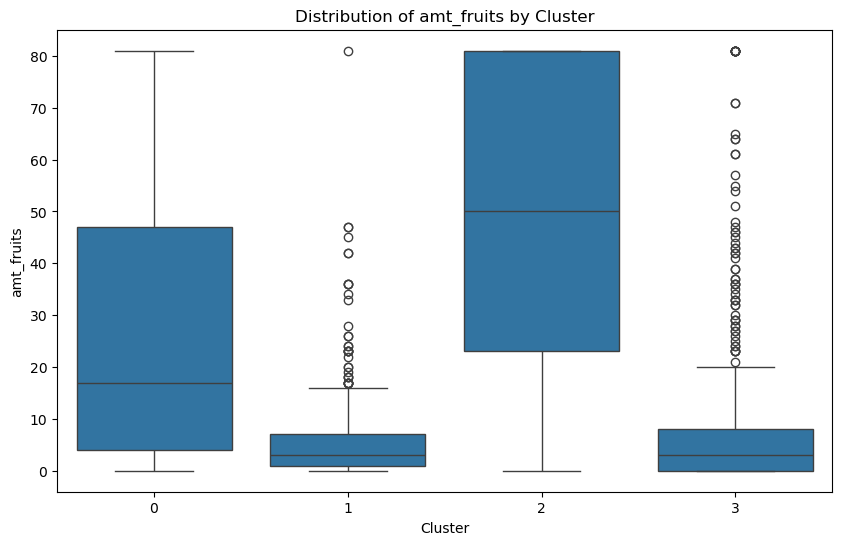

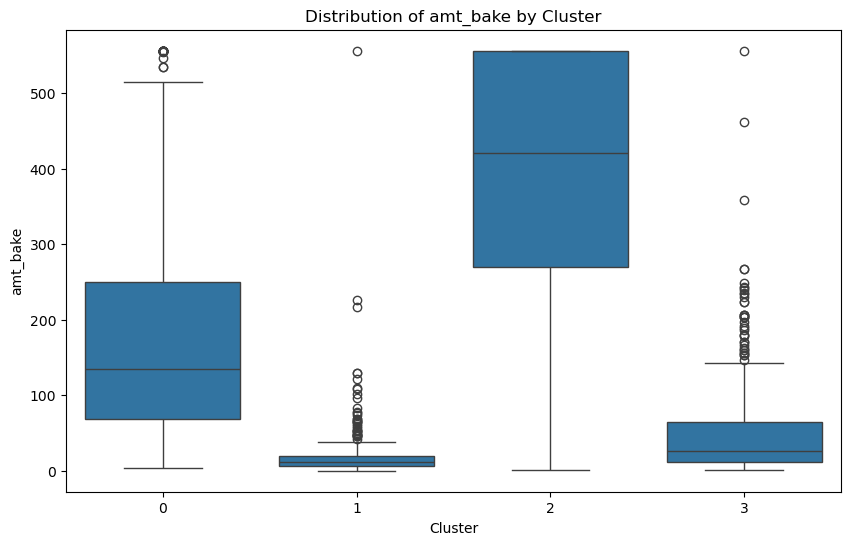

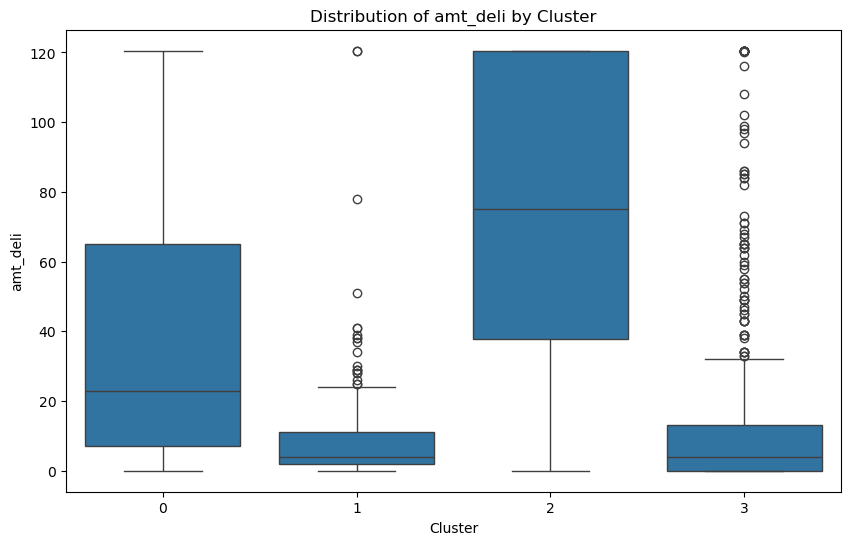

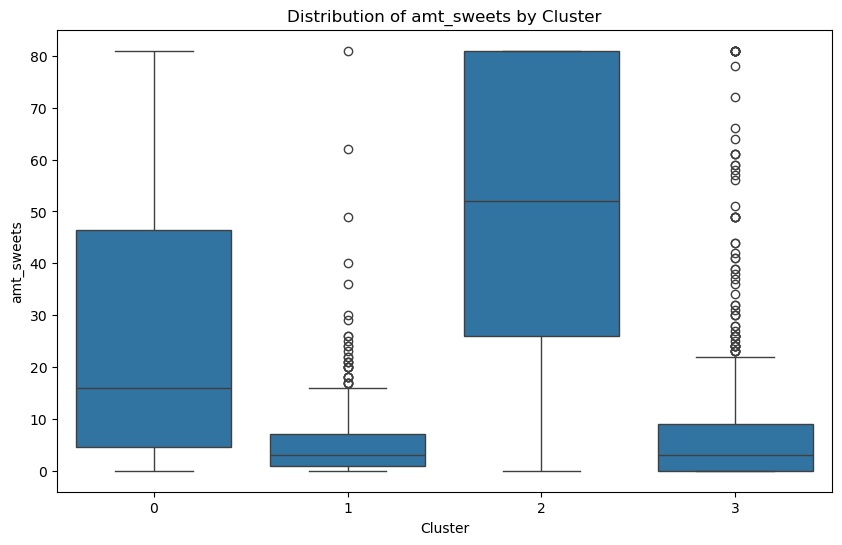

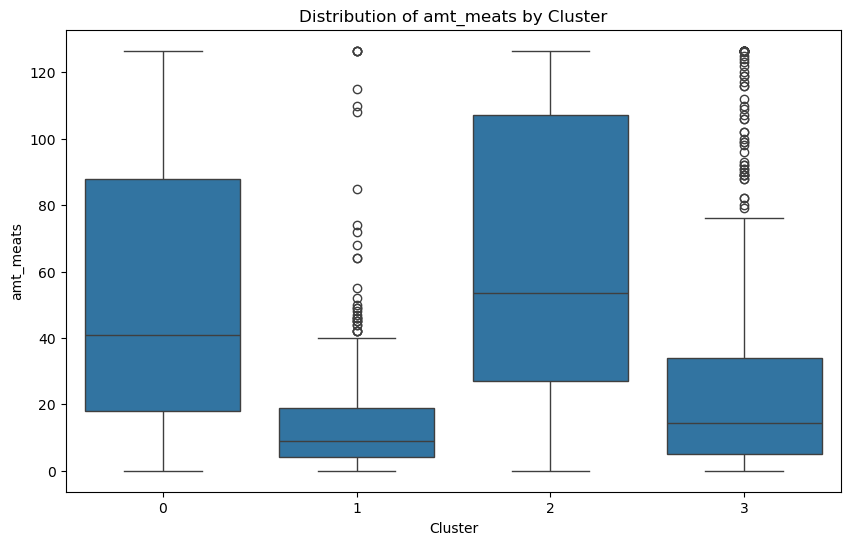

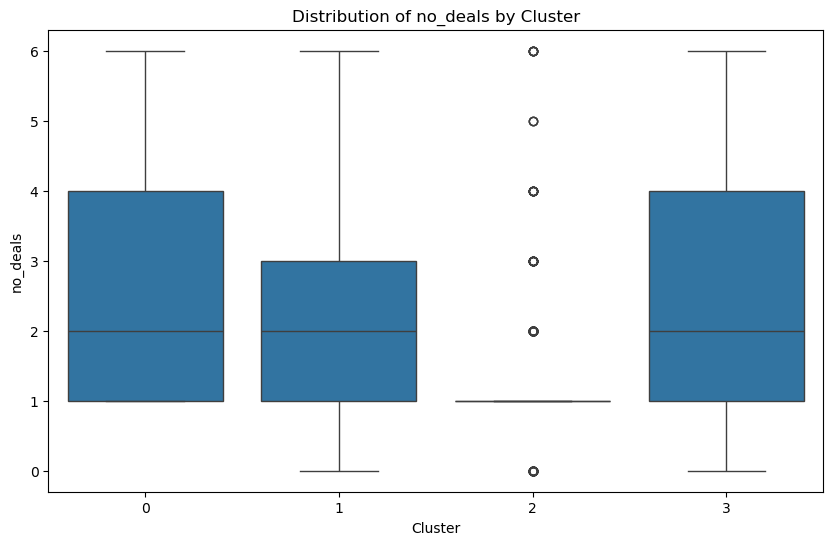

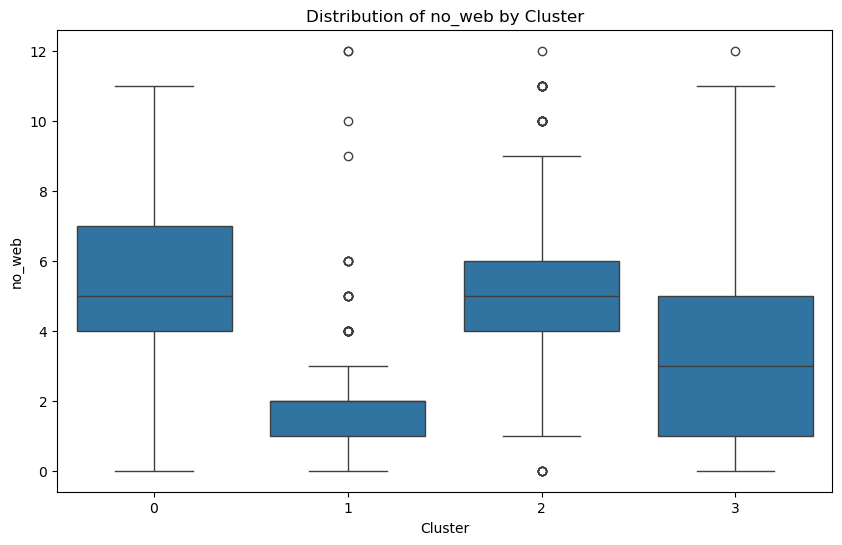

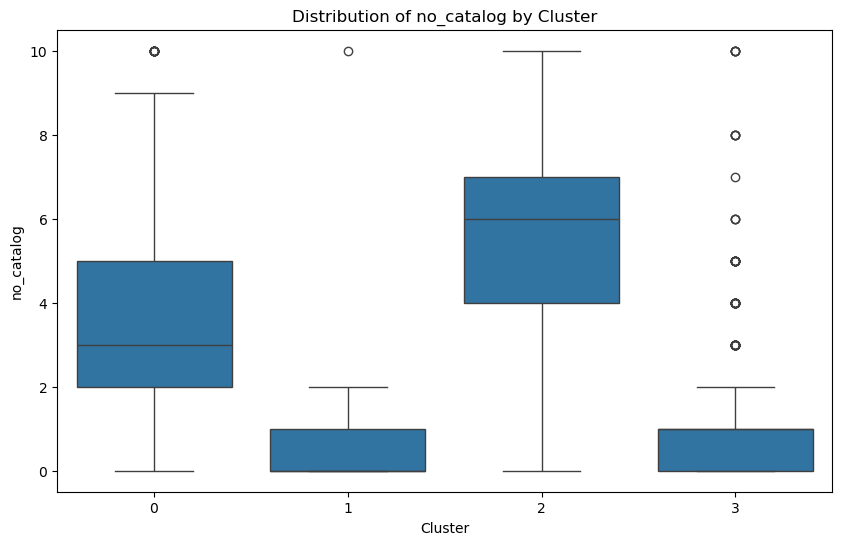

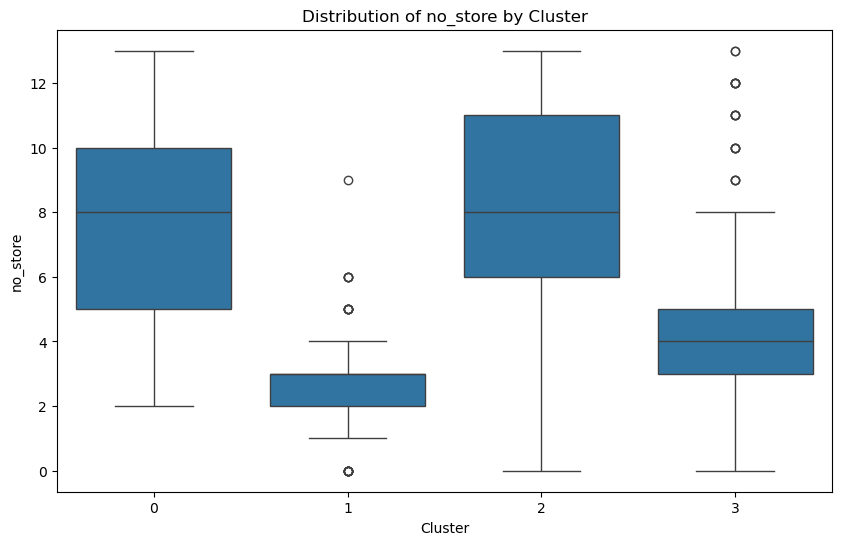

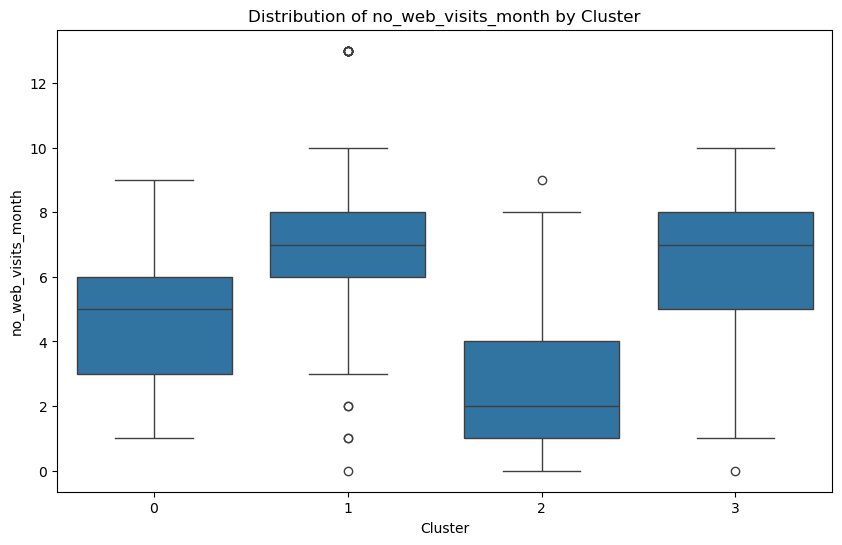

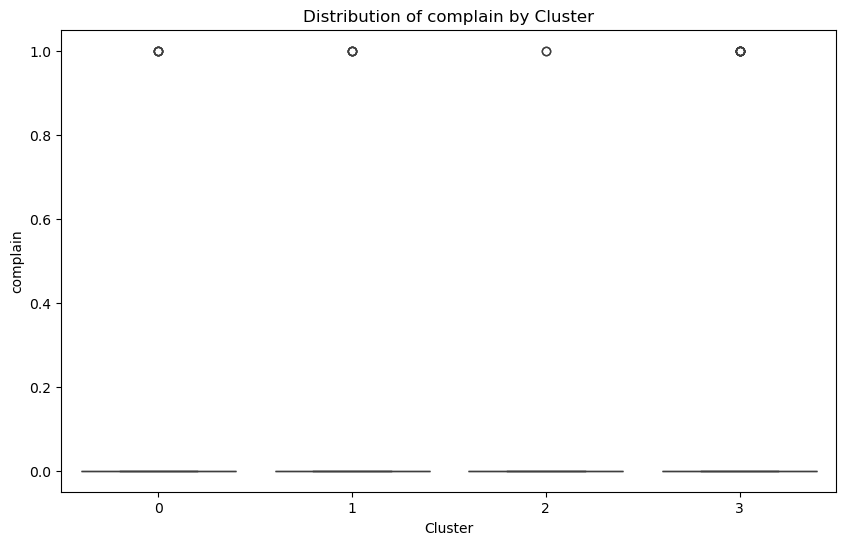

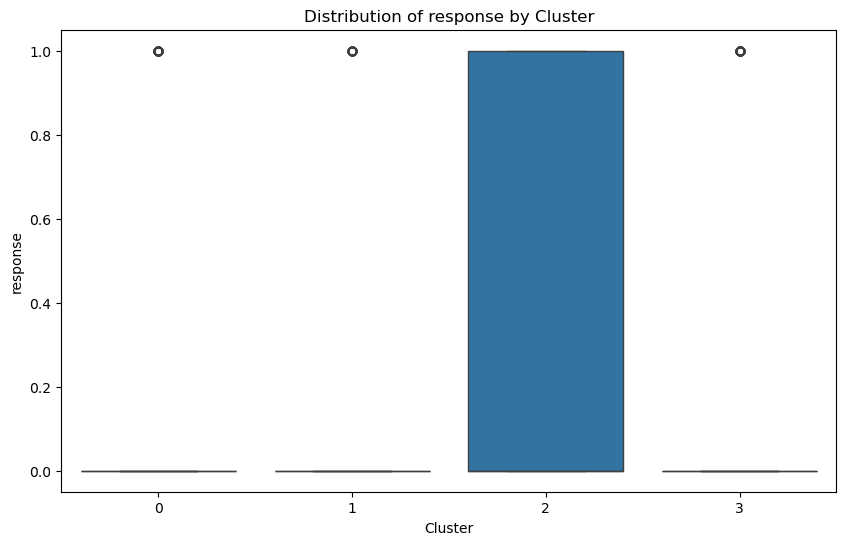

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
features_to_plot = [
    'income', 'kid_le_12', 'kid_teen', 'amt_wines',
    'amt_fruits', 'amt_bake', 'amt_deli', 'amt_sweets', 'amt_meats',
    'no_deals', 'no_web', 'no_catalog', 'no_store', 'no_web_visits_month',
    'complain', 'response'
]
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Segment', y=feature, data=df_n)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

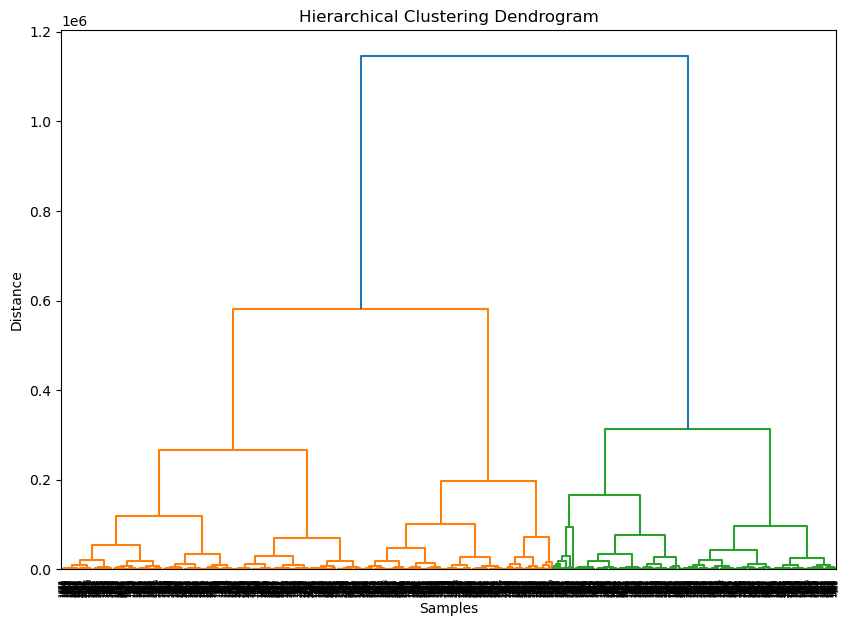

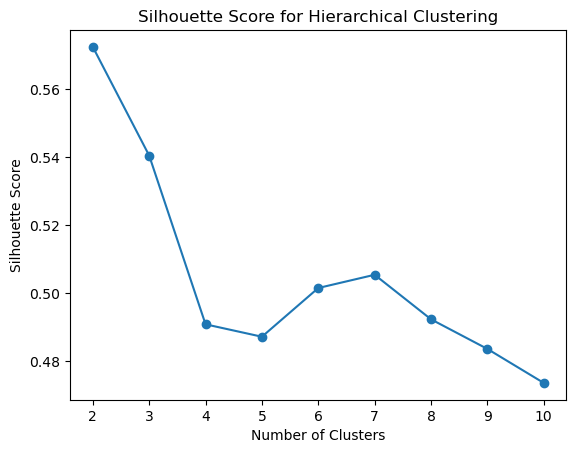

In [ ]:


from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Assuming df_clustering is your DataFrame for clustering


df_clustering_scaled = df_numerical

# Create the linkage matrix for the dendrogram
linked = linkage(df_clustering_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Perform Agglomerative Clustering
range_n_clusters = list(range(2, 11))
silhouette_scores = []
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    labels = hc.fit_predict(df_clustering_scaled)
    silhouette_avg = silhouette_score(df_clustering_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Hierarchical Clustering')
plt.show()


In [ ]:
print(silhouette_scores)

[0.5723567309591769, 0.5403941771688605, 0.49076418010603334, 0.4871106535152689, 0.5014457210981567, 0.5053380669417831, 0.49224225600160826, 0.4835295933588857, 0.4735271530675708]


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
# Perform hierarchical clustering (Agglomerative Clustering)
hierarchical_clustering = AgglomerativeClustering(n_clusters=4)  # You can set n_clusters as per your dendrogram analysis
labels = hierarchical_clustering.fit_predict(df_clustering)

# Assign the clusters to your DataFrame
df2['Segment'] = labels

# Calculate silhouette score
print(silhouette_score(df_clustering, labels))

0.49076418010603334


Cluster Size:
Segment
0    867
2    549
3    449
1    368
Name: count, dtype: int64

Cluster Feature Means:
            guest_id  education  marital_status        income  kid_le_12  \
Segment                                                                    
0        5484.424452   2.389850        2.506344  47515.819493   0.552480   
1        5633.366848   2.456522        2.529891  82993.660326   0.081522   
2        5665.848816   2.928962        2.524590  25096.591075   0.788707   
3        5692.425390   2.432071        2.434298  67393.809577   0.111359   

         kid_teen    recency   amt_wines  amt_fruits    amt_bake   amt_deli  \
Segment                                                                       
0        0.745098  49.786621  202.678777   11.457901   69.908881  17.327566   
1        0.230978  49.584239  650.538043   48.581522  400.576087  73.551630   
2        0.249545  48.291439   22.883424    5.863388   20.956284   8.311475   
3        0.583519  48.726058  550.541203

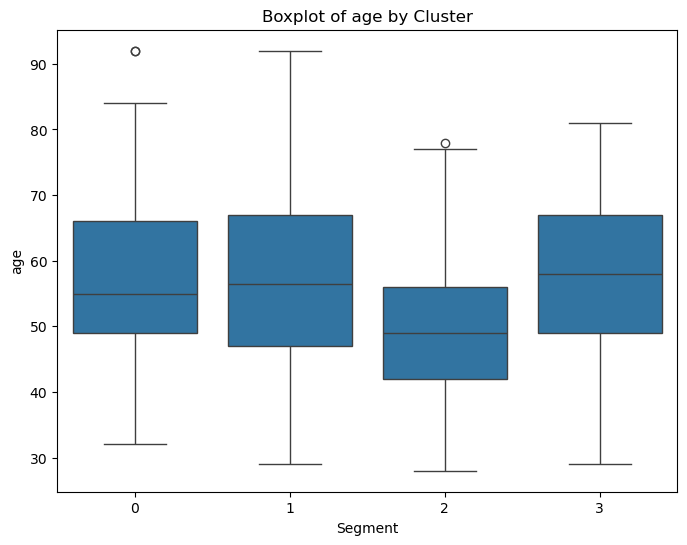

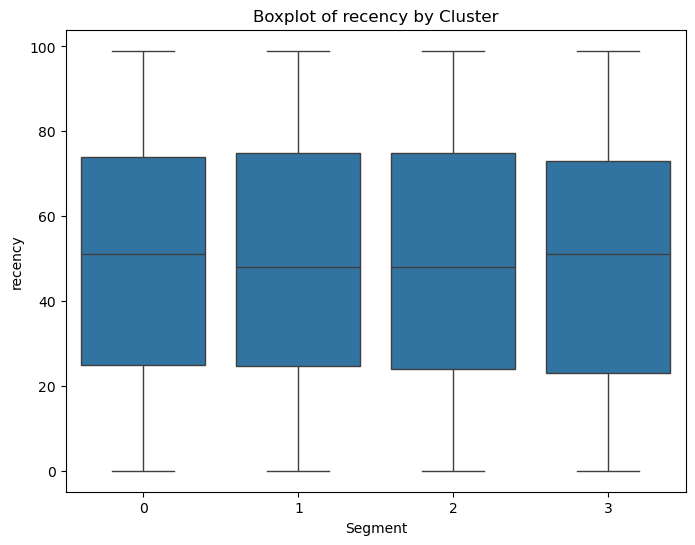

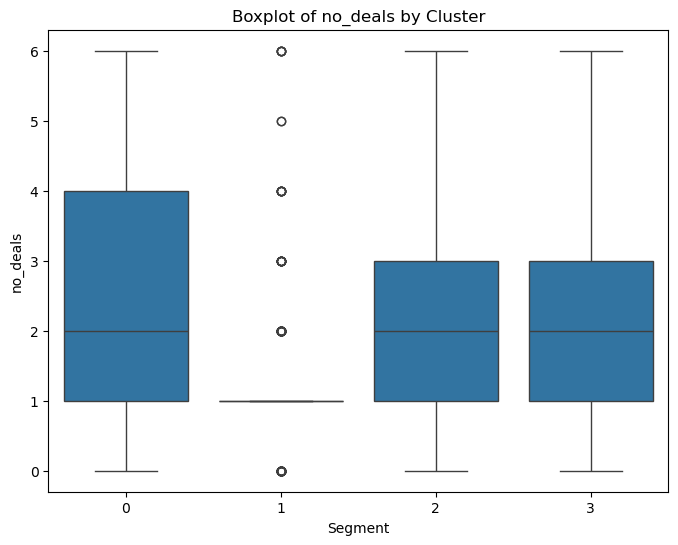

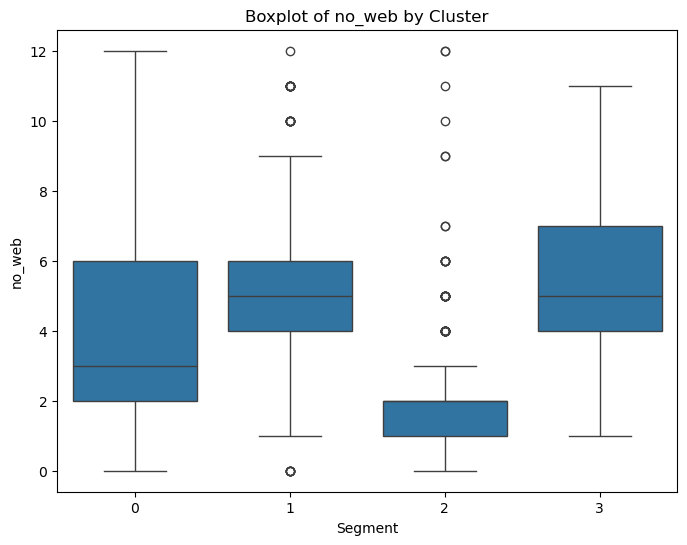

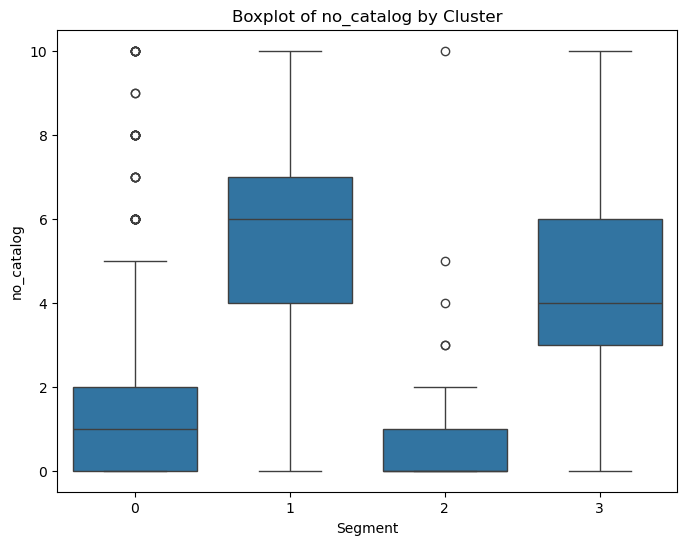

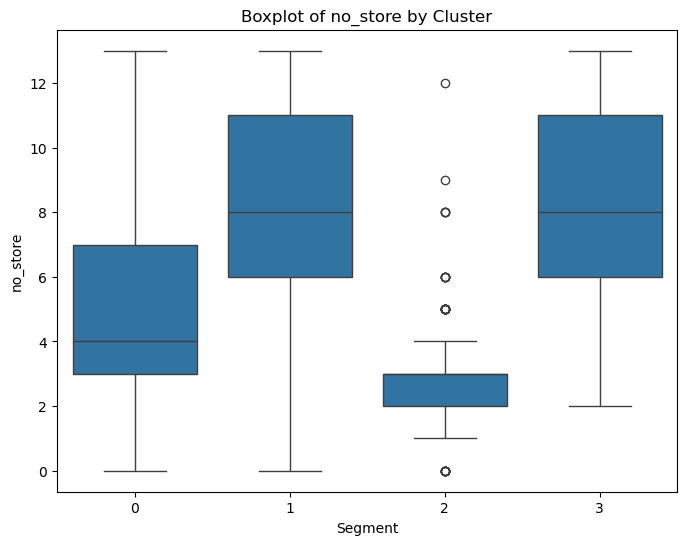

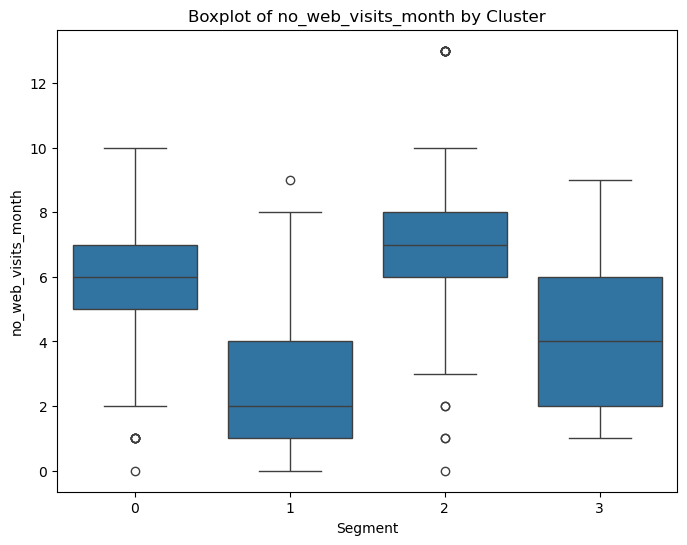

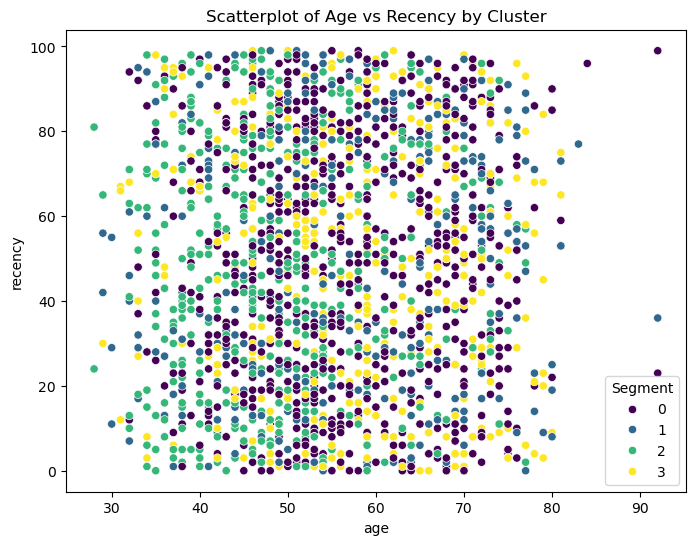

In [ ]:

import pandas as pd

# Assuming 'df' is your dataset, and 'Segment' is the cluster label column

# 1. Basic Cluster Size
cluster_size = df2['Segment'].value_counts()
print("Cluster Size:")
print(cluster_size)

# 2. Cluster Means (centroid-like analysis)
# Get the mean value of each feature for each cluster
cluster_means = df2.groupby('Segment').mean()
print("\nCluster Feature Means:")
print(cluster_means)

# 3. Statistical Summary for each cluster
cluster_summary = df2.groupby('Segment').describe()
print("\nCluster Summary Statistics:")
print(cluster_summary)

# 4. Visualizations

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for each feature per cluster
features_to_plot = ['age', 'recency', 'no_deals', 'no_web', 'no_catalog', 'no_store', 'no_web_visits_month']
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Segment', y=feature, data=df2)
    plt.title(f'Boxplot of {feature} by Cluster')
    plt.show()

# Scatter Plot for two key features (age vs recency) colored by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='recency', hue='Segment', data=df2, palette='viridis')
plt.title('Scatterplot of Age vs Recency by Cluster')
plt.show()


In [ ]:
cluster_response = df2.groupby('Segment')['response'].mean()
print(cluster_response)

Segment
0    0.114187
1    0.320652
2    0.100182
3    0.131403
Name: response, dtype: float64


In [ ]:
!pip install pyclustering

In [ ]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric, type_metric
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Define the range of cluster sizes
range_n_clusters = list(range(2, 11))
silhouette_scores = []
total_cost = []

# Euclidean distance metric
metric = distance_metric(type_metric.EUCLIDEAN)
df_clustering = df_numerical
for n_clusters in range_n_clusters:
    # Initialize the K-Medoids with random medoids
    initial_medoids = np.random.choice(len(df_clustering), n_clusters, replace=False).tolist()

    # Create the K-Medoids algorithm instance
    kmedoids_instance = kmedoids(df_clustering.values, initial_medoids, metric=metric)

    # Run the K-Medoids algorithm
    kmedoids_instance.process()

    # Get the clusters and medoids
    clusters = kmedoids_instance.get_clusters()
    medoids = kmedoids_instance.get_medoids()

    # Convert the clusters into labels for silhouette score calculation
    labels = np.zeros(len(df_clustering))
    for cluster_id, cluster in enumerate(clusters):
        labels[cluster] = cluster_id

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(df_clustering, labels)
    silhouette_scores.append(silhouette_avg)

    # Calculate the total cost (sum of distances to medoids)
    cost = 0
    for cluster_id, cluster in enumerate(clusters):
        medoid = df_clustering.iloc[medoids[cluster_id]].values
        for point_idx in cluster:
            point = df_clustering.iloc[point_idx].values
            cost += metric(medoid, point)
    total_cost.append(cost)

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Number of Clusters (K-Medoids)')
plt.show()

# Plot total cost (inertia equivalent)
plt.plot(range_n_clusters, total_cost, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Total Cost (Inertia)')
plt.title('Total Cost for Different Number of Clusters (K-Medoids)')
plt.show()


In [ ]:
print(silhouette_scores)

In [ ]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric, type_metric
from sklearn.metrics import silhouette_score
import numpy as np

# Initialize K-Medoids with random medoids
initial_medoids = np.random.choice(len(df_clustering), 4, replace=False).tolist()

# Create the K-Medoids algorithm instance with Euclidean distance metric
metric = distance_metric(type_metric.EUCLIDEAN)
kmedoids_instance = kmedoids(df_clustering.values, initial_medoids, metric=metric)

# Run the K-Medoids algorithm
kmedoids_instance.process()

# Get the clusters and medoids
clusters = kmedoids_instance.get_clusters()

# Convert clusters into labels
labels = np.zeros(len(df_clustering))
for cluster_id, cluster in enumerate(clusters):
    labels[cluster] = cluster_id

# Assign the segment labels to the DataFrame
df3['Segment'] = labels

# Calculate the silhouette score
print(silhouette_score(df_clustering, labels))


In [ ]:

import pandas as pd

# Assuming 'df' is your dataset, and 'Segment' is the cluster label column

# 1. Basic Cluster Size
cluster_size = df3['Segment'].value_counts()
print("Cluster Size:")
print(cluster_size)

# 2. Cluster Means (centroid-like analysis)
# Get the mean value of each feature for each cluster
cluster_means = df3.groupby('Segment').mean()
print("\nCluster Feature Means:")
print(cluster_means)

# 3. Statistical Summary for each cluster
cluster_summary = df3.groupby('Segment').describe()
print("\nCluster Summary Statistics:")
print(cluster_summary)

# 4. Visualizations

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for each feature per cluster
features_to_plot = ['age', 'recency', 'no_deals', 'no_web', 'no_catalog', 'no_store', 'no_web_visits_month']
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Segment', y=feature, data=df3)
    plt.title(f'Boxplot of {feature} by Cluster')
    plt.show()

# Scatter Plot for two key features (age vs recency) colored by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='income', y='amt_wines', hue='Segment', data=df3, palette='viridis')
plt.title('Scatterplot of Age vs Recency by Cluster')
plt.show()


In [ ]:
cluster_response = df3.groupby('Segment')['response'].mean()
print(cluster_response)

In [ ]:
import pandas as pd
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def calculate_metrics(df, segment_column):
    labels = df[segment_column]
    silhouette = silhouette_score(df.drop(columns=[segment_column]), labels)
    davies_bouldin = davies_bouldin_score(df.drop(columns=[segment_column]), labels)
    calinski_harabasz = calinski_harabasz_score(df.drop(columns=[segment_column]), labels)
    return silhouette, davies_bouldin, calinski_harabasz

# Compute metrics for each dataset
metrics = {
    'Dataset': [],
    'Model': [],
    'Silhouette Score': [],
    'Davies-Bouldin Index': [],
    'Calinski-Harabasz Index': []
}

# For df_n (K-Means)
silhouette, davies_bouldin, calinski_harabasz = calculate_metrics(df_n, 'Segment')
metrics['Dataset'].append('df_n')
metrics['Model'].append('K-Means')
metrics['Silhouette Score'].append(silhouette)
metrics['Davies-Bouldin Index'].append(davies_bouldin)
metrics['Calinski-Harabasz Index'].append(calinski_harabasz)

# For df2 (Hierarchical)
silhouette, davies_bouldin, calinski_harabasz = calculate_metrics(df2, 'Segment')
metrics['Dataset'].append('df2')
metrics['Model'].append('Hierarchical')
metrics['Silhouette Score'].append(silhouette)
metrics['Davies-Bouldin Index'].append(davies_bouldin)
metrics['Calinski-Harabasz Index'].append(calinski_harabasz)

# For df3 (K-Medoids)
silhouette, davies_bouldin, calinski_harabasz = calculate_metrics(df3, 'Segment')
metrics['Dataset'].append('df3')
metrics['Model'].append('K-Medoids')
metrics['Silhouette Score'].append(silhouette)
metrics['Davies-Bouldin Index'].append(davies_bouldin)
metrics['Calinski-Harabasz Index'].append(calinski_harabasz)

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Plotting
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score Plot
ax[0].bar(metrics_df['Model'] + ' (' + metrics_df['Dataset'] + ')', metrics_df['Silhouette Score'], color='skyblue')
ax[0].set_title('Silhouette Score')
ax[0].set_xlabel('Model (Dataset)')
ax[0].set_ylabel('Score')

# Davies-Bouldin Index Plot
ax[1].bar(metrics_df['Model'] + ' (' + metrics_df['Dataset'] + ')', metrics_df['Davies-Bouldin Index'], color='lightgreen')
ax[1].set_title('Davies-Bouldin Index')
ax[1].set_xlabel('Model (Dataset)')
ax[1].set_ylabel('Index')

# Calinski-Harabasz Index Plot
ax[2].bar(metrics_df['Model'] + ' (' + metrics_df['Dataset'] + ')', metrics_df['Calinski-Harabasz Index'], color='lightcoral')
ax[2].set_title('Calinski-Harabasz Index')
ax[2].set_xlabel('Model (Dataset)')
ax[2].set_ylabel('Index')

plt.tight_layout()
plt.show()


# K_means is the best model among those

## As elbow point of KMeans inertia curve is at 4 and 5. and silhouette score is high at 4. So let's take 4 clusters

In [ ]:

import pandas as pd

# Assuming 'df' is your dataset, and 'Segment' is the cluster label column

# 1. Basic Cluster Size
cluster_size = df_n['Segment'].value_counts()
print("Cluster Size:")
print(cluster_size)

# 2. Cluster Means (centroid-like analysis)
# Get the mean value of each feature for each cluster
cluster_means = df_n.groupby('Segment').mean()
print("\nCluster Feature Means:")
print(cluster_means)

# 3. Statistical Summary for each cluster
cluster_summary = df_n.groupby('Segment').describe()
print("\nCluster Summary Statistics:")
print(cluster_summary)

# 4. Visualizations

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for each feature per cluster
features_to_plot = ['age', 'recency', 'no_deals', 'no_web', 'no_catalog', 'no_store', 'no_web_visits_month']
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Segment', y=feature, data=df_n)
    plt.title(f'Boxplot of {feature} by Cluster')
    plt.show()

# Scatter Plot for two key features (age vs recency) colored by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='income', y='amt_wines', hue='Segment', data=df_n, palette='viridis')
plt.title('Scatterplot of Age vs Recency by Cluster')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
features_to_plot = [
    'income', 'kid_le_12', 'kid_teen', 'amt_wines',
    'amt_fruits', 'amt_bake', 'amt_deli', 'amt_sweets', 'amt_meats',
    'no_deals', 'no_web', 'no_catalog', 'no_store', 'no_web_visits_month',
    'complain', 'response'
]
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Segment', y=feature, data=df_n)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

In [ ]:
# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Box Plots for each feature
features_to_plot = ['income',
    'age',
    'Total_Spend',
    'recency',
    'no_web_visits_month',
    'no_deals',
    'no_web',
    'no_catalog',
    'no_store',]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 5, i)  # 2 rows, 3 columns
    sns.boxplot(x='Segment', y=feature, data=df_n)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()



In [ ]:
# 2. Violin Plots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 5, i)
    sns.violinplot(x='Segment', y=feature, data=df_n)
    plt.title(f'Violin Plot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# Response & Cluster analysis

In [ ]:
cluster_response = df_n.groupby('Segment')['response'].mean()
print(cluster_response)

In [ ]:
# Visualize the cluster distribution with respect to response
sns.countplot(x='Segment', hue='response', data=df_n)
plt.title(f'Cluster vs Response for k={3}')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_n is your DataFrame and it contains 'Segment' and 'response' columns
# Calculate the total count per cluster
total_counts = df_n.groupby('Segment').size()

# Calculate the count of each response type per cluster
response_counts = df_n.groupby(['Segment', 'response']).size().unstack(fill_value=0)

# Calculate the fraction of each response type within each cluster
response_fractions = response_counts.div(total_counts, axis=0)

# Reset index to prepare for plotting
response_fractions = response_fractions.reset_index()

# Melt the DataFrame for seaborn
response_fractions_melted = response_fractions.melt(id_vars='Segment', var_name='response', value_name='fraction')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='fraction', hue='response', data=response_fractions_melted, palette='viridis')
plt.title(f'Cluster vs Response Fraction for k={3}')
plt.ylabel('Fraction')
plt.xlabel('Cluster')
plt.show()


In [ ]:

response_counts = df_n.groupby(['Segment', 'response']).size().unstack(fill_value=0)

# Calculate the fraction of each response type within each cluster
response_fractions = response_counts.div(response_counts.sum(axis=1), axis=0)

# Set up the matplotlib figure
fig, axs = plt.subplots(2, 2, figsize=(7, 7), subplot_kw=dict(aspect="equal"))

# Define the colors for the pie chart
colors = plt.get_cmap('coolwarm')(range(len(response_fractions.columns)))

# Plot each pie chart for the clusters
for idx, (segment, fractions) in enumerate(response_fractions.iterrows()):
    ax = axs[idx // 2, idx % 2]
    ax.pie(fractions, labels=fractions.index, autopct='%1.1f%%', colors=colors, startangle=90)
    ax.set_title(f'Cluster {segment}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


## Labelling

# Cluster Analysis Summary

## Cluster 0
- **Size:** 643 members
- **Demographics:**
  - **Average Age:** 58.1 years
  - **Education Level:** Mostly Masters (Level 2)
  - **Marital Status:** Together or Married
  - **Income:** High, with an average income of around $61,715
- **Family:**
  - **Kids under 12:** Few, with an average of 0.22
  - **Teenagers:** High, with an average of 0.76
- **Shopping Behavior:**
  - **Total Spend:** Highest, with an average of $785.14
  - **High Expenditure in:** Wines, Fruits, Baked Goods
  - **Moderate Expenditure in:** Sweets, Meats
- **Engagement:**
  - **Web Visits:** Moderate (average 4.83 visits/month)
  - **Web Purchases:** Highest among other clusters
  - **Catalogs and Store Visits:** Moderate
- **Responses and Complaints:**
  - **Complaint Rate:** Low (0.77%)
  - **Response Rate:** Moderate (10.57%)

## Cluster 1
- **Size:** 456 members
- **Demographics:**
  - **Average Age:** 49.5 years
  - **Education Level:** Mostly Graduation
  - **Marital Status:** Together or Married
  - **Income:** Low, with an average income of around $23,300
- **Family:**
  - **Kids under 12:** High, with an average of 0.78
  - **Teenagers:** Low, with an average of 0.21
- **Shopping Behavior:**
  - **Total Spend:** Lowest, with an average of $69.31
  - **Low Expenditure in:** Wines, Fruits, Baked Goods
  - **High Expenditure in:** Sweets
- **Engagement:**
  - **Web Visits:** Highest (7.00 visits/month)
  - **Web Purchases:** Lowest among all clusters
  - **Catalogs and Store Visits:** Low
- **Responses and Complaints:**
  - **Complaint Rate:** Slightly higher (1.10%)
  - **Response Rate:** Moderate (10.53%)

## Cluster 2
- **Size:** 460 members
- **Demographics:**
  - **Average Age:** 56.4 years
  - **Education Level:** Mostly Graduation or Masters
  - **Marital Status:** Mostly Married or Together
  - **Income:** Very High, with an average income of around $80,928
- **Family:**
  - **Kids under 12:** Very Few, with an average of 0.08
  - **Teenagers:** Moderate, with an average of 0.25
- **Shopping Behavior:**
  - **Total Spend:** High, at $1270.06
  - **Very High Expenditure in:** Wines, Fruits, Baked Goods, Meats, Deli
- **Engagement:**
  - **Web Visits:** Low (2.74 visits/month)
  - **Web Purchases:** Moderate to High
  - **Catalogs and Store Visits:** Very High
- **Responses and Complaints:**
  - **Complaint Rate:** Low (0.43%)
  - **Response Rate:** High (29.78%)

## Cluster 3
- **Size:** 674 members
- **Demographics:**
  - **Average Age:** 55.3 years
  - **Education Level:** Mostly Graduation or Masters
  - **Marital Status:** More Married or Together
  - **Income:** Moderate, with an average income of around $41,901
- **Family:**
  - **Kids under 12:** Moderate, with an average of 0.68
  - **Teenagers:** Moderate, with an average of 0.64
- **Shopping Behavior:**
  - **Total Spend:** Moderate, at an average of $220.33
  - **High Expenditure in:** Wines, Baked Goods
  - **Moderate Expenditure in:** Meats, Deli, Fruits
- **Engagement:**
  - **Web Visits:** Moderate (6.35 visits/month)
  - **Web Purchases:** Moderate
  - **Catalogs and Store Visits:** Moderate
- **Responses and Complaints:**
  - **Complaint Rate:** Slightly Higher (1.34%)
  - **Response Rate:** Moderate (11.57%)

## Summary for Labeling
- **Cluster 0:** High-income, older age group, high total spend, moderate engagement, moderate web purchases.
- **Cluster 1:** Low-income, younger age group, high kids under 12, low total spend, high web engagement, low web purchases.
- **Cluster 2:** Very high-income, older age group, high total spend, low engagement, high web purchases.
- **Cluster 3:** Moderate-income, balanced family profile, moderate total spend, moderate engagement, moderate web purchases.


#                                                 Thank you